<a href="https://colab.research.google.com/github/AndreiAf02/Job-Satisfaction/blob/main/Job_Satisfaction_CZ_Seniority.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install semopy

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import semopy
import math
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import bootstrap, norm

## Data Preprocessing:

In [3]:
# path_to_data = 'https://raw.githubusercontent.com/EduardoAve/Labour-well-being/refs/heads/main/data/02_processed/'
path_to_data2 = 'https://raw.githubusercontent.com/EduardoAve/Labour-well-being/refs/heads/main/data/01_raw-00/'

In [4]:
data_total = pd.read_csv(path_to_data2+ "Final_Dataset.csv", sep=",", header=0)
data_total.columns = data_total.columns.str.replace(".","")
data_total

,Country,Version,1 Gender:,2 Age (in years):,Unnamed: 4,3 Nationality:,4 Current marital (partnership) status:,5 Do you currently care for underage children or dependent relatives?,6 The type of higher education insitution where you primarily work:,7 Subject area of the faculty (higher education institution) where you primarily work:,...,36 I tend to overwork,37 I don’t consider my work to be finished until I am completely satisfied with the result,38 My thoughts revolve around work almost exclusively,"39 When I’m unsuccessful at work, it makes me feel very down","40 If I don’t succeed at something, that just makes me all the more determined",41 I can be calm and collected in almost all situations,42 My life up till now has been characterized by professional success,"43 By and large, I am happy and content",44 I have the full support of my family,Vulnerability
0,2,4,2.0,28.0,2.0,Spanish,3.0,1.0,1.0,1.0,...,4.0,4.0,3.0,4.0,1.0,4.0,1.0,3.0,5.0,4.0
1,2,4,1.0,33.0,2.0,German,2.0,1.0,1.0,3.0,...,5.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,5.0,4.0
2,2,4,2.0,32.0,2.0,Kosovan,3.0,1.0,NaN,5.0,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,5.0,3.0
3,2,4,NaN,30.0,2.0,Spain,2.0,1.0,1.0,5.0,...,4.0,5.0,1.0,5.0,2.0,4.0,2.0,3.0,3.0,4.0
4,2,4,1.0,39.0,2.0,Italian,2.0,2.0,1.0,5.0,...,5.0,5.0,3.0,3.0,3.0,2.0,4.0,4.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,1,1,1.0,27.0,4.0,NaN,2.0,1.0,4.0,1.0,...,2.0,4.0,2.0,3.0,2.0,3.0,4.0,3.0,4.0,2.0
2743,1,1,1.0,80.0,3.0,NaN,1.0,1.0,4.0,6.0,...,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
2744,1,1,2.0,27.0,6.0,NaN,3.0,1.0,4.0,3.0,...,2.0,3.0,1.0,1.0,3.0,3.0,5.0,5.0,3.0,2.0
2745,1,1,2.0,28.0,4.0,NaN,3.0,1.0,4.0,1.0,...,5.0,4.0,4.0,4.0,3.0,3.0,3.0,1.0,4.0,NaN


In [5]:
print(data_total.columns.tolist())

['Country', 'Version', '1 Gender:', '2 Age (in years):', 'Unnamed: 4', '3 Nationality:', '4 Current marital (partnership) status:', '5 Do you currently care for underage children or dependent relatives?', '6 The type of higher education insitution where you primarily work:', '7 Subject area of the faculty (higher education institution) where you primarily work:', '8 Duration of your current employment contract at the higher education institution where you primarily work:', '9 Extent of employment in higher education (in hours/week, aggregated for all higher education institutions where you work):', '10 Actual average weekly working hours in higher education (in a typical semester week):', 'Effort (less, more, equal)', 'Effort [%]', 'Income CZK', 'Income EURO', 'Euro Adj', 'Salary/hour', 'Salary effort/hour', '12 Do you hold a leadership position at a higher education institution?', '13 How influential are you in helping to shape key academic policies at your institution at the level of

In [6]:
data_at_total = data_total[data_total['Country']==1].reset_index(drop=True)
data_cz_total = data_total[data_total['Country']==2].reset_index(drop=True)
data_cz_total

,Country,Version,1 Gender:,2 Age (in years):,Unnamed: 4,3 Nationality:,4 Current marital (partnership) status:,5 Do you currently care for underage children or dependent relatives?,6 The type of higher education insitution where you primarily work:,7 Subject area of the faculty (higher education institution) where you primarily work:,...,36 I tend to overwork,37 I don’t consider my work to be finished until I am completely satisfied with the result,38 My thoughts revolve around work almost exclusively,"39 When I’m unsuccessful at work, it makes me feel very down","40 If I don’t succeed at something, that just makes me all the more determined",41 I can be calm and collected in almost all situations,42 My life up till now has been characterized by professional success,"43 By and large, I am happy and content",44 I have the full support of my family,Vulnerability
0,2,4,2.0,28.0,2.0,Spanish,3.0,1.0,1.0,1.0,...,4.0,4.0,3.0,4.0,1.0,4.0,1.0,3.0,5.0,4.0
1,2,4,1.0,33.0,2.0,German,2.0,1.0,1.0,3.0,...,5.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,5.0,4.0
2,2,4,2.0,32.0,2.0,Kosovan,3.0,1.0,NaN,5.0,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,5.0,3.0
3,2,4,NaN,30.0,2.0,Spain,2.0,1.0,1.0,5.0,...,4.0,5.0,1.0,5.0,2.0,4.0,2.0,3.0,3.0,4.0
4,2,4,1.0,39.0,2.0,Italian,2.0,2.0,1.0,5.0,...,5.0,5.0,3.0,3.0,3.0,2.0,4.0,4.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,2,2,1.0,57.0,1.0,NaN,1.0,1.0,1.0,9.0,...,2.0,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,1.0
1415,2,2,1.0,40.0,1.0,NaN,2.0,1.0,1.0,5.0,...,2.0,4.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,2.0
1416,2,2,2.0,29.0,2.0,Slovenská republika,2.0,1.0,1.0,3.0,...,4.0,4.0,3.0,5.0,4.0,2.0,3.0,3.0,5.0,3.0
1417,2,2,2.0,50.0,1.0,NaN,1.0,1.0,1.0,9.0,...,4.0,3.0,1.0,1.0,NaN,NaN,NaN,5.0,4.0,NaN


In [7]:
data_cz_job = data_cz_total[['2 Age (in years):',
    'CZ_15 Your current position at the higher education institution, where you primarily work: ', ## Current Position
    'Salary/hour',
    '8 Duration of your current employment contract at the higher education institution where you primarily work:', ## Contract Duration
    '10 Actual average weekly working hours in higher education (in a typical semester week):', ## Actual Weekly Working Hours
    'Effort [%]', ## Effort = actual hours/contract hours
    '1 Teaching (classroom instruction, preparation of instructional materials and lesson plans, advising students, reading and evaluating student work, examination management, etc)', ## Teaching hours
    '2 Research (reading literature, designing and conducting experiments, collecting and analysing data, writing articles or other scientific texts, etc)', ## Research Hours
    '3 Activities related to externally funded research projects (searching for information on available funding sources, preparation of grant applications and project reports, project management and administration, etc)', ## Research Admin hours
    '4 Organisational and administrative activities (organising and attending meetings, dealing with tasks and documents not directly related to teaching, research, or externally funded research projects, etc)', ## General Admin hours
    '12 Do you hold a leadership position at a higher education institution?', ## Leadership position
    '13 How influential are you in helping to shape key academic policies at your institution at the level of department or similar unit?', ## Policy Influence
    ## ACADEMIC RESOURCES:
    '1 Facilities and technological equipment (offices, classrooms, laboratories, computers, projectors, teaching software)', ## Academic Resources - FACILITIES
    '2 Research equipment (instruments, tools, materials, software for working with data)', ## Academic Resources - RESEARCH EQUIP
    '3 Availability of scientific literature (access to up-to-date scientific articles and books)', ## Academic Resources - LITERATURE
    '4 Personnel support (support from secretarial, administrative and technical staff, laboratory technicians, etc)', ## Academic Resources - SUPPORT
    '5 Opportunities for personal and professional development (offer and availability of professional courses and internships, opportunities to participate at conferences and other professional events)', ## Academic Resources - PD
    '6 Availability of resources for research funding', ## Academic Resources - FUNDING
    ## PERFORMANCE PRESSURE:
    '1 At my institution, there is a strong performance orientation',
    ## PERCEIVED AUTONOMY:
    '2 I feel like I can be myself at my job', ## KEEP ORDER
    "3 At work, I often feel like I have to follow other people’s commands", ## TO INVERT
    '4 If I could choose, I would do things at work differently', ## TO INVERT
    '5 The tasks I have to do at work are in line with what I really want to do', ## KEEP ORDER
    '6 I feel free to do my job the way I think it could best be done', ## KEEP ORDER
    '7 In my job, I feel forced to do things I do not want to do ', ## TO INVERT
    ## QUALITY OF LEADERSHIP:
    '1  makes sure that the members of staff have good development opportunities', ## KEEP ORDER
    '2  gives high priority to job satisfaction', ## KEEP ORDER
    '3  is good at work planning', ## KEEP ORDER
    '4  is good at solving conflicts ', ## KEEP ORDER
    ## SENSE OF COMMUNITY:
    '1 There is a good atmosphere between myself and my colleagues ',
    '2 There is good co-operation between the colleagues at work',
    '3 I feel part of a community at my place of work',
    ## JOB SATISFACTION:
    '1  your work prospects? ',
    '2   the physical working conditions (eg facilities, equipment, physical working environment)?',
    '3  the way your abilities are used?',
    '4  your salary?',
    '5  your job as a whole, everything taken into consideration? '
]]

In [8]:
data_cz_job.columns.tolist()

['2 Age (in years):',
 'CZ_15 Your current position at the higher education institution, where you primarily work: ',
 'Salary/hour',
 '8 Duration of your current employment contract at the higher education institution where you primarily work:',
 '10 Actual average weekly working hours in higher education (in a typical semester week):',
 'Effort [%]',
 '1 Teaching (classroom instruction, preparation of instructional materials and lesson plans, advising students, reading and evaluating student work, examination management, etc)',
 '2 Research (reading literature, designing and conducting experiments, collecting and analysing data, writing articles or other scientific texts, etc)',
 '3 Activities related to externally funded research projects (searching for information on available funding sources, preparation of grant applications and project reports, project management and administration, etc)',
 '4 Organisational and administrative activities (organising and attending meetings, deali

In [9]:
data_cz_job.columns = ['Age',
    'Current_position', ## Current Position
    'Salary',
    'Contract_duration', ## Contract Duration
    'Actual_hrs', ## Actual Weekly Working Hours
    'Effort', ## Effort = actual hours/contract hours
    'Teaching_hrs', ## Teaching hours
    'Research_hrs', ## Research Hours
    'External_funding_hrs', ## External Research Funding hours
    'Admin_hrs', ## General Admin hours
    'Leadership_position', ## Leadership position
    'Policy_influence', ## Policy Influence
    ## ACADEMIC RESOURCES:
    'Acad_res_facility', ## Academic Resources - FACILITIES
    'Acad_res_equip', ## Academic Resources - RESEARCH EQUIP
    'Acad_res_lit', ## Academic Resources - LITERATURE
    'Acad_res_support', ## Academic Resources - SUPPORT
    'Acad_res_PD', ## Academic Resources - PD
    'Acad_res_funding', ## Academic Resources - FUNDING
    ## PERFORMANCE PRESSURE:
    'Performance_pressure',
    ## PERCEIVED AUTONOMY:
    'Be_myself', ## KEEP ORDER
    "Follow_commands", ## TO INVERT
    'Do_differently', ## TO INVERT
    'Want_to_do', ## KEEP ORDER
    'Done_best', ## KEEP ORDER
    'Forced_to_do', ## TO INVERT
    ## QUALITY OF LEADERSHIP:
    'Development_opportunities', ## KEEP ORDER
    'Prioritizes_satisfaction', ## KEEP ORDER
    'Work_planning', ## KEEP ORDER
    'Solving_conflicts', ## KEEP ORDER
    ## SENSE OF COMMUNITY:
    'Good_atmosphere',
    'Good_cooperation',
    'Part_of_community',
    ## JOB SATISFACTION:
    'Work_prospects',
    'Physical_working_conditions',
    'Use_of_abilities',
    'Satisfaction_w_salary',
    'Overall_satisfaction']

In [10]:
data_cz_job.columns.tolist()

['Age',
 'Current_position',
 'Salary',
 'Contract_duration',
 'Actual_hrs',
 'Effort',
 'Teaching_hrs',
 'Research_hrs',
 'External_funding_hrs',
 'Admin_hrs',
 'Leadership_position',
 'Policy_influence',
 'Acad_res_facility',
 'Acad_res_equip',
 'Acad_res_lit',
 'Acad_res_support',
 'Acad_res_PD',
 'Acad_res_funding',
 'Performance_pressure',
 'Be_myself',
 'Follow_commands',
 'Do_differently',
 'Want_to_do',
 'Done_best',
 'Forced_to_do',
 'Development_opportunities',
 'Prioritizes_satisfaction',
 'Work_planning',
 'Solving_conflicts',
 'Good_atmosphere',
 'Good_cooperation',
 'Part_of_community',
 'Work_prospects',
 'Physical_working_conditions',
 'Use_of_abilities',
 'Satisfaction_w_salary',
 'Overall_satisfaction']

In [11]:
data_cz_job = data_cz_job.dropna(subset=['Age', 'Current_position', 'Leadership_position']).reset_index(drop=True)
for col in data_cz_job.columns:
  data_cz_job[col] = data_cz_job[col].astype(str).str.replace(',', '.').astype(float)
data_cz_job.to_csv('data_cz_job.csv')
data_cz_job

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,28.0,3.0,9.613782,2.0,50.0,125.0,5.0,29.0,1.0,15.0,...,3.0,2.0,4.0,3.0,1.0,1.0,3.0,3.0,2.0,2.0
1,33.0,3.0,4.326923,3.0,50.0,125.0,5.0,30.0,5.0,10.0,...,2.0,2.0,2.0,1.0,2.0,3.0,4.0,2.0,1.0,2.0
2,32.0,3.0,NaN,4.0,1.5,100.0,NaN,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,30.0,3.0,8.213535,1.0,40.0,100.0,20.0,10.0,NaN,10.0,...,1.0,1.0,5.0,1.0,3.0,3.0,4.0,3.0,1.0,3.0
4,39.0,4.0,7.931370,2.0,NaN,NaN,20.0,20.0,10.0,3.0,...,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,45.0,4.0,8.652404,1.0,40.0,100.0,17.0,17.0,4.0,2.0,...,3.0,3.0,4.0,3.0,3.0,3.0,2.0,3.0,1.0,4.0
1375,57.0,6.0,12.017228,2.0,40.0,100.0,18.0,6.0,1.0,9.0,...,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0
1376,40.0,4.0,10.334816,1.0,40.0,100.0,22.0,6.0,4.0,8.0,...,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1377,29.0,4.0,9.613782,2.0,40.0,100.0,5.0,1.0,1.0,1.0,...,4.0,4.0,5.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0


In [12]:
## Using the IQR to eliminate outliers for Salary, Average_hours, and Effort:

Q1_salary = data_cz_job['Salary'].quantile(0.25)
Q3_salary = data_cz_job['Salary'].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary

lower_bound_salary = Q1_salary - 1.5 * IQR_salary
upper_bound_salary = Q3_salary + 1.5 * IQR_salary

Q1_hrs = data_cz_job['Actual_hrs'].quantile(0.25)
Q3_hrs = data_cz_job['Actual_hrs'].quantile(0.75)
IQR_hrs = Q3_hrs - Q1_hrs

lower_bound_hrs = Q1_hrs - 1.5 * IQR_hrs
upper_bound_hrs = Q3_hrs + 1.5 * IQR_hrs

Q1_effort = data_cz_job['Effort'].quantile(0.25)
Q3_effort = data_cz_job['Effort'].quantile(0.75)
IQR_effort = Q3_effort - Q1_effort

lower_bound_effort = Q1_effort - 1.5 * IQR_effort
upper_bound_effort = Q3_effort + 1.5 * IQR_effort




data_cz_job = data_cz_job[(data_cz_job['Salary'] > lower_bound_salary) & (data_cz_job['Salary'] < upper_bound_salary) &
                          (data_cz_job['Actual_hrs'] > lower_bound_hrs) & (data_cz_job['Actual_hrs'] < upper_bound_hrs) &
                           (data_cz_job['Effort'] > lower_bound_effort) & (data_cz_job['Effort'] < upper_bound_effort)].reset_index(drop=True)

data_cz_job

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,28.0,3.0,9.613782,2.0,50.0,125.0,5.0,29.0,1.0,15.0,...,3.0,2.0,4.0,3.0,1.0,1.0,3.0,3.0,2.0,2.0
1,33.0,3.0,4.326923,3.0,50.0,125.0,5.0,30.0,5.0,10.0,...,2.0,2.0,2.0,1.0,2.0,3.0,4.0,2.0,1.0,2.0
2,30.0,3.0,8.213535,1.0,40.0,100.0,20.0,10.0,NaN,10.0,...,1.0,1.0,5.0,1.0,3.0,3.0,4.0,3.0,1.0,3.0
3,39.0,4.0,9.613782,2.0,40.0,100.0,33.0,10.0,6.0,2.5,...,5.0,5.0,5.0,5.0,5.0,4.0,5.0,2.0,1.0,2.0
4,44.0,4.0,13.699640,1.0,40.0,100.0,20.0,2.0,5.0,13.0,...,4.0,3.0,4.0,5.0,5.0,5.0,3.0,4.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,45.0,4.0,8.652404,1.0,40.0,100.0,17.0,17.0,4.0,2.0,...,3.0,3.0,4.0,3.0,3.0,3.0,2.0,3.0,1.0,4.0
916,57.0,6.0,12.017228,2.0,40.0,100.0,18.0,6.0,1.0,9.0,...,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0
917,40.0,4.0,10.334816,1.0,40.0,100.0,22.0,6.0,4.0,8.0,...,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
918,29.0,4.0,9.613782,2.0,40.0,100.0,5.0,1.0,1.0,1.0,...,4.0,4.0,5.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0


In [13]:
np.sort(data_cz_job['Leadership_position'].unique())

array([1., 2., 3., 4.])

In [14]:
data_cz_job

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,28.0,3.0,9.613782,2.0,50.0,125.0,5.0,29.0,1.0,15.0,...,3.0,2.0,4.0,3.0,1.0,1.0,3.0,3.0,2.0,2.0
1,33.0,3.0,4.326923,3.0,50.0,125.0,5.0,30.0,5.0,10.0,...,2.0,2.0,2.0,1.0,2.0,3.0,4.0,2.0,1.0,2.0
2,30.0,3.0,8.213535,1.0,40.0,100.0,20.0,10.0,NaN,10.0,...,1.0,1.0,5.0,1.0,3.0,3.0,4.0,3.0,1.0,3.0
3,39.0,4.0,9.613782,2.0,40.0,100.0,33.0,10.0,6.0,2.5,...,5.0,5.0,5.0,5.0,5.0,4.0,5.0,2.0,1.0,2.0
4,44.0,4.0,13.699640,1.0,40.0,100.0,20.0,2.0,5.0,13.0,...,4.0,3.0,4.0,5.0,5.0,5.0,3.0,4.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,45.0,4.0,8.652404,1.0,40.0,100.0,17.0,17.0,4.0,2.0,...,3.0,3.0,4.0,3.0,3.0,3.0,2.0,3.0,1.0,4.0
916,57.0,6.0,12.017228,2.0,40.0,100.0,18.0,6.0,1.0,9.0,...,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0
917,40.0,4.0,10.334816,1.0,40.0,100.0,22.0,6.0,4.0,8.0,...,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
918,29.0,4.0,9.613782,2.0,40.0,100.0,5.0,1.0,1.0,1.0,...,4.0,4.0,5.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0


In [15]:
## Interpolating the missing answer data using averages from each job position:
data_cz_job_interpolated = data_cz_job
data_cz_job_interpolated.columns

for i in range(len(data_cz_job_interpolated.columns)-3):
  for j in np.sort(data_cz_job_interpolated['Current_position'].unique()):
    interpolation = data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][data_cz_job_interpolated['Current_position']== j].mean()
    print('Interpolated Value:', interpolation)
    data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
    & (data_cz_job_interpolated['Current_position']== j)] = interpolation #data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][data_cz_job_interpolated['Current_position']== j].mean()

data_cz_job_interpolated.to_csv('data_cz_job_interpolated.csv')
data_cz_job_interpolated



Interpolated Value: 9.263754595931376
Interpolated Value: 9.306675383162633
Interpolated Value: 9.006568130052885
Interpolated Value: 10.210540283738673
Interpolated Value: 12.536882157078598
Interpolated Value: 13.926171455950971
Interpolated Value: 9.471047384003393
Interpolated Value: 10.995763526591722
Interpolated Value: 1.3783783783783783
Interpolated Value: 1.6666666666666667
Interpolated Value: 1.7118644067796611
Interpolated Value: 1.4142011834319526
Interpolated Value: 1.1101694915254237
Interpolated Value: 1.103448275862069
Interpolated Value: 2.0930232558139537
Interpolated Value: 1.75
Interpolated Value: 40.6042471042471
Interpolated Value: 43.888888888888886
Interpolated Value: 43.559322033898304
Interpolated Value: 44.22041420118343
Interpolated Value: 45.36864406779661
Interpolated Value: 43.206896551724135
Interpolated Value: 42.877906976744185
Interpolated Value: 50.25
Interpolated Value: 103.83873031194462
Interpolated Value: 107.68518518518519
Interpolated Value: 11

/tmp/ipython-input-3438967378.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-343

Interpolated Value: 2.206896551724138
Interpolated Value: 2.225225225225225
Interpolated Value: 1.9230769230769231
Interpolated Value: 2.392857142857143
Interpolated Value: 2.8372093023255816
Interpolated Value: 1.5
Interpolated Value: 3.2316602316602316
Interpolated Value: 3.7037037037037037
Interpolated Value: 3.4915254237288136
Interpolated Value: 3.8813056379821957
Interpolated Value: 3.9661016949152543
Interpolated Value: 3.793103448275862
Interpolated Value: 3.9651162790697674
Interpolated Value: 4.25
Interpolated Value: 3.498069498069498
Interpolated Value: 3.5925925925925926
Interpolated Value: 3.2542372881355934
Interpolated Value: 3.307462686567164
Interpolated Value: 3.5084745762711864
Interpolated Value: 3.857142857142857
Interpolated Value: 3.5813953488372094
Interpolated Value: 2.5
Interpolated Value: 3.32295719844358
Interpolated Value: 3.0
Interpolated Value: 3.135593220338983
Interpolated Value: 3.142433234421365
Interpolated Value: 2.8728813559322033
Interpolated Valu

/tmp/ipython-input-3438967378.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-343

Interpolated Value: 3.0326409495548963
Interpolated Value: 3.135593220338983
Interpolated Value: 2.9655172413793105
Interpolated Value: 2.441860465116279
Interpolated Value: 3.5
Interpolated Value: 3.552123552123552
Interpolated Value: 3.4814814814814814
Interpolated Value: 3.305084745762712
Interpolated Value: 3.3134328358208953
Interpolated Value: 3.299145299145299
Interpolated Value: 3.413793103448276
Interpolated Value: 3.558139534883721
Interpolated Value: 3.25
Interpolated Value: 3.4671814671814674
Interpolated Value: 3.4074074074074074
Interpolated Value: 3.2542372881355934
Interpolated Value: 3.222551928783383
Interpolated Value: 3.1440677966101696
Interpolated Value: 3.5
Interpolated Value: 3.3411764705882354
Interpolated Value: 4.0
Interpolated Value: 3.135135135135135
Interpolated Value: 3.111111111111111
Interpolated Value: 2.982456140350877
Interpolated Value: 2.9851632047477743
Interpolated Value: 2.9743589743589745
Interpolated Value: 3.0
Interpolated Value: 2.9186046511

/tmp/ipython-input-3438967378.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-343

Interpolated Value: 3.635593220338983
Interpolated Value: 3.793103448275862
Interpolated Value: 4.069767441860465
Interpolated Value: 3.75
Interpolated Value: 3.9150579150579152
Interpolated Value: 3.3333333333333335
Interpolated Value: 3.542372881355932
Interpolated Value: 3.6834319526627217
Interpolated Value: 3.58974358974359
Interpolated Value: 3.9310344827586206
Interpolated Value: 3.802325581395349
Interpolated Value: 3.25
Interpolated Value: 2.8378378378378377
Interpolated Value: 3.074074074074074
Interpolated Value: 2.847457627118644
Interpolated Value: 2.967065868263473
Interpolated Value: 3.282051282051282
Interpolated Value: 4.0
Interpolated Value: 2.941860465116279
Interpolated Value: 2.75
Interpolated Value: 3.505791505791506
Interpolated Value: 3.3703703703703702
Interpolated Value: 3.2711864406779663
Interpolated Value: 3.363905325443787
Interpolated Value: 3.389830508474576
Interpolated Value: 3.689655172413793
Interpolated Value: 3.6627906976744184
Interpolated Value: 

/tmp/ipython-input-3438967378.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-343

Interpolated Value: 2.016949152542373
Interpolated Value: 2.1038575667655786
Interpolated Value: 2.5847457627118646
Interpolated Value: 2.7586206896551726
Interpolated Value: 2.453488372093023
Interpolated Value: 2.0


,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,28.0,3.0,9.613782,2.0,50.0,125.0,5.0,29.0,1.000000,15.0,...,3.0,2.0,4.0,3.0,1.0,1.0,3.0,3.0,2.0,2.0
1,33.0,3.0,4.326923,3.0,50.0,125.0,5.0,30.0,5.000000,10.0,...,2.0,2.0,2.0,1.0,2.0,3.0,4.0,2.0,1.0,2.0
2,30.0,3.0,8.213535,1.0,40.0,100.0,20.0,10.0,2.645455,10.0,...,1.0,1.0,5.0,1.0,3.0,3.0,4.0,3.0,1.0,3.0
3,39.0,4.0,9.613782,2.0,40.0,100.0,33.0,10.0,6.000000,2.5,...,5.0,5.0,5.0,5.0,5.0,4.0,5.0,2.0,1.0,2.0
4,44.0,4.0,13.699640,1.0,40.0,100.0,20.0,2.0,5.000000,13.0,...,4.0,3.0,4.0,5.0,5.0,5.0,3.0,4.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,45.0,4.0,8.652404,1.0,40.0,100.0,17.0,17.0,4.000000,2.0,...,3.0,3.0,4.0,3.0,3.0,3.0,2.0,3.0,1.0,4.0
916,57.0,6.0,12.017228,2.0,40.0,100.0,18.0,6.0,1.000000,9.0,...,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0
917,40.0,4.0,10.334816,1.0,40.0,100.0,22.0,6.0,4.000000,8.0,...,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
918,29.0,4.0,9.613782,2.0,40.0,100.0,5.0,1.0,1.000000,1.0,...,4.0,4.0,5.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0


In [16]:
## PERCEIVED AUTONOMY:
inversion_list = ['Follow_commands', ## TO INVERT
                  'Do_differently', ## TO INVERT
                  'Forced_to_do'] ## TO INVERT

data_cz_job_w_inversion = data_cz_job_interpolated


for col in inversion_list:
  print('Before:', col, ":", np.sort(data_cz_job_w_inversion[col].unique()))
  data_cz_job_w_inversion[col] = max(data_cz_job_w_inversion[col])+1 - data_cz_job_w_inversion[col]
  print(col, ":", np.sort(data_cz_job_w_inversion[col].unique()))

data_cz_job_w_inversion.to_csv('data_cz_job_w_inversion.csv')
data_cz_job_w_inversion



Before: Follow_commands : [1.         2.         3.         3.14243323 3.3229572  4.
 5.        ]
Follow_commands : [1.         2.         2.6770428  2.85756677 3.         4.
 5.        ]
Before: Do_differently : [1.         2.         3.         3.32941176 3.69369369 4.
 5.        ]
Do_differently : [1.         2.         2.30630631 2.67058824 3.         4.
 5.        ]
Before: Forced_to_do : [1.         2.         3.         3.03264095 4.         5.        ]
Forced_to_do : [1.         2.         2.96735905 3.         4.         5.        ]


,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,28.0,3.0,9.613782,2.0,50.0,125.0,5.0,29.0,1.000000,15.0,...,3.0,2.0,4.0,3.0,1.0,1.0,3.0,3.0,2.0,2.0
1,33.0,3.0,4.326923,3.0,50.0,125.0,5.0,30.0,5.000000,10.0,...,2.0,2.0,2.0,1.0,2.0,3.0,4.0,2.0,1.0,2.0
2,30.0,3.0,8.213535,1.0,40.0,100.0,20.0,10.0,2.645455,10.0,...,1.0,1.0,5.0,1.0,3.0,3.0,4.0,3.0,1.0,3.0
3,39.0,4.0,9.613782,2.0,40.0,100.0,33.0,10.0,6.000000,2.5,...,5.0,5.0,5.0,5.0,5.0,4.0,5.0,2.0,1.0,2.0
4,44.0,4.0,13.699640,1.0,40.0,100.0,20.0,2.0,5.000000,13.0,...,4.0,3.0,4.0,5.0,5.0,5.0,3.0,4.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,45.0,4.0,8.652404,1.0,40.0,100.0,17.0,17.0,4.000000,2.0,...,3.0,3.0,4.0,3.0,3.0,3.0,2.0,3.0,1.0,4.0
916,57.0,6.0,12.017228,2.0,40.0,100.0,18.0,6.0,1.000000,9.0,...,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0
917,40.0,4.0,10.334816,1.0,40.0,100.0,22.0,6.0,4.000000,8.0,...,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
918,29.0,4.0,9.613782,2.0,40.0,100.0,5.0,1.0,1.000000,1.0,...,4.0,4.0,5.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0


In [17]:
data_cz_formatted = data_cz_job_w_inversion

data_cz_formatted = data_cz_formatted.dropna(subset = ['Overall_satisfaction']).reset_index(drop=True)


## Calculating percentage hours for teaching and research:
data_cz_formatted['Teaching_percent'] = data_cz_formatted['Teaching_hrs']/data_cz_formatted[['Teaching_hrs', 'Research_hrs',
                                                                                             'External_funding_hrs', 'Admin_hrs']].sum(axis=1)*100
data_cz_formatted['Research_percent'] = data_cz_formatted['Research_hrs']/data_cz_formatted[['Teaching_hrs', 'Research_hrs',
                                                                                             'External_funding_hrs', 'Admin_hrs']].sum(axis=1)*100
data_cz_formatted = data_cz_formatted.drop(['Teaching_hrs', 'Research_hrs', 'External_funding_hrs', 'Admin_hrs'], axis=1)


## Calculating average score for Academic Resources:
data_cz_formatted['Academic_Resources'] = data_cz_formatted[['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                                                             'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                        'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding'], axis=1)


## Calculating average score for Perceived Autonomy:
data_cz_formatted['Perceived_Autonomy'] = data_cz_formatted[['Be_myself', "Follow_commands", 'Do_differently',
                                                             'Want_to_do', 'Done_best', 'Forced_to_do']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Be_myself', "Follow_commands", 'Do_differently',
                        'Want_to_do', 'Done_best', 'Forced_to_do'], axis=1)


## Calculating average score for Leadership quality:
data_cz_formatted['Leadership_quality'] = data_cz_formatted[['Development_opportunities', 'Prioritizes_satisfaction',
                                                             'Work_planning', 'Solving_conflicts']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Development_opportunities', 'Prioritizes_satisfaction',
                                                             'Work_planning', 'Solving_conflicts'],axis=1)


## Calculating average score for sense of community:
data_cz_formatted['Sense_of_community'] = data_cz_formatted[['Good_atmosphere', 'Good_cooperation',
                                                             'Part_of_community']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Good_atmosphere', 'Good_cooperation', 'Part_of_community'], axis=1)

## Calculating average score for job satisfaction:
data_cz_formatted['Job_satisfaction'] = data_cz_formatted[['Work_prospects', 'Physical_working_conditions',
                                                           'Use_of_abilities', 'Satisfaction_w_salary',
                                                           'Overall_satisfaction']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Work_prospects', 'Physical_working_conditions',
                        'Use_of_abilities', 'Satisfaction_w_salary',
                        'Overall_satisfaction'],axis=1)


data_cz_formatted.to_csv('data_cz_formatted.csv')
print(data_cz_formatted.columns.tolist())

['Age', 'Current_position', 'Salary', 'Contract_duration', 'Actual_hrs', 'Effort', 'Leadership_position', 'Policy_influence', 'Performance_pressure', 'Teaching_percent', 'Research_percent', 'Academic_Resources', 'Perceived_Autonomy', 'Leadership_quality', 'Sense_of_community', 'Job_satisfaction']


In [18]:
data_cz_formatted

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Leadership_position,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Job_satisfaction
0,28.0,3.0,9.613782,2.0,50.0,125.0,1.0,1.0,1.0,10.000000,58.000000,3.166667,1.833333,3.00,2.666667,2.2
1,33.0,3.0,4.326923,3.0,50.0,125.0,1.0,1.0,5.0,10.000000,60.000000,3.000000,1.500000,2.00,1.666667,2.4
2,30.0,3.0,8.213535,1.0,40.0,100.0,1.0,2.0,1.0,46.898316,23.449158,2.333333,3.833333,2.00,3.000000,2.8
3,39.0,4.0,9.613782,2.0,40.0,100.0,1.0,2.0,2.0,64.077670,19.417476,4.000000,4.500000,5.00,5.000000,2.8
4,44.0,4.0,13.699640,1.0,40.0,100.0,2.0,5.0,4.0,50.000000,5.000000,3.166667,3.333333,3.75,4.666667,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,45.0,4.0,8.652404,1.0,40.0,100.0,1.0,1.0,4.0,42.500000,42.500000,3.833333,2.666667,3.75,3.333333,2.6
916,57.0,6.0,12.017228,2.0,40.0,100.0,2.0,5.0,2.0,52.941176,17.647059,3.833333,4.333333,3.00,4.333333,4.0
917,40.0,4.0,10.334816,1.0,40.0,100.0,3.0,4.0,4.0,55.000000,15.000000,3.833333,4.000000,3.50,4.000000,4.0
918,29.0,4.0,9.613782,2.0,40.0,100.0,1.0,1.0,4.0,62.500000,12.500000,3.166667,3.500000,4.00,5.000000,3.4


In [19]:
## Taking only academic seniority positions:

# data_cz_formatted_academic = data_cz_formatted[~data_cz_formatted['Current_position'].isin([1., 9.])]
data_cz_formatted_academic = data_cz_formatted[data_cz_formatted['Current_position'].isin([3., 4., 5., 6.])]

np.sort(data_cz_formatted_academic['Current_position'].unique())

array([3., 4., 5., 6.])

**Contract duration has 7 values, but only 5 possible responses. To remove the "Other" and leave only 1-4?**

**Similarly, Leadership position has only 3 possible responses, but 4 values. To remove 4 and leave only 1-3?**

In [20]:
np.sort(data_cz_formatted_academic['Contract_duration'].unique())
data_cz_formatted_academic['Contract_duration'].value_counts()

,count
Contract_duration,
1.0,369
2.0,161
3.0,10
5.0,3
6.0,1


In [21]:
data_cz_formatted_academic['Leadership_position'].value_counts()

,count
Leadership_position,
1.0,379
2.0,90
3.0,59
4.0,16


In [22]:
## Cleaning up the outlier values in Contract Duration and Leadership position prior to creating dummy variables:
data_cz_formatted_academic = data_cz_formatted_academic[data_cz_formatted_academic['Contract_duration']<4].reset_index(drop=True)
data_cz_formatted_academic = data_cz_formatted_academic[data_cz_formatted_academic['Leadership_position']<4].reset_index(drop=True)

data_cz_formatted_academic['Contract_duration'].value_counts()

,count
Contract_duration,
1.0,355
2.0,159
3.0,10


In [23]:
data_cz_formatted_academic['Leadership_position'].value_counts()

,count
Leadership_position,
1.0,376
2.0,90
3.0,58


In [24]:
data_cz_formatted_academic.to_csv('data_cz_formatted_seniority.csv')
data_cz_formatted_academic

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Leadership_position,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Job_satisfaction
0,28.0,3.0,9.613782,2.0,50.0,125.0,1.0,1.0,1.0,10.000000,58.000000,3.166667,1.833333,3.00,2.666667,2.2
1,33.0,3.0,4.326923,3.0,50.0,125.0,1.0,1.0,5.0,10.000000,60.000000,3.000000,1.500000,2.00,1.666667,2.4
2,30.0,3.0,8.213535,1.0,40.0,100.0,1.0,2.0,1.0,46.898316,23.449158,2.333333,3.833333,2.00,3.000000,2.8
3,39.0,4.0,9.613782,2.0,40.0,100.0,1.0,2.0,2.0,64.077670,19.417476,4.000000,4.500000,5.00,5.000000,2.8
4,44.0,4.0,13.699640,1.0,40.0,100.0,2.0,5.0,4.0,50.000000,5.000000,3.166667,3.333333,3.75,4.666667,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,45.0,4.0,8.652404,1.0,40.0,100.0,1.0,1.0,4.0,42.500000,42.500000,3.833333,2.666667,3.75,3.333333,2.6
520,57.0,6.0,12.017228,2.0,40.0,100.0,2.0,5.0,2.0,52.941176,17.647059,3.833333,4.333333,3.00,4.333333,4.0
521,40.0,4.0,10.334816,1.0,40.0,100.0,3.0,4.0,4.0,55.000000,15.000000,3.833333,4.000000,3.50,4.000000,4.0
522,29.0,4.0,9.613782,2.0,40.0,100.0,1.0,1.0,4.0,62.500000,12.500000,3.166667,3.500000,4.00,5.000000,3.4


Text(0.5, 1.0, 'Czech Positions')

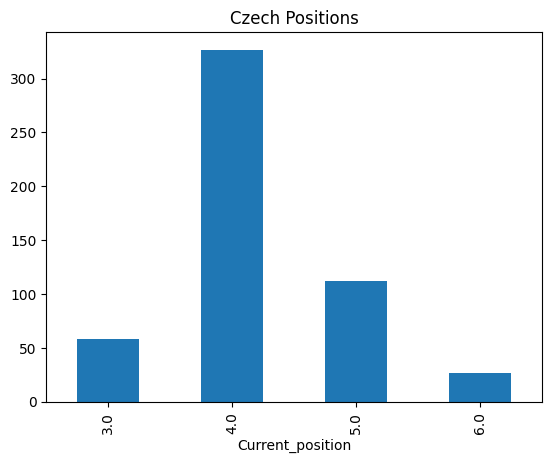

In [25]:
data_cz_formatted_academic['Current_position'].value_counts().sort_index().plot(kind='bar')
plt.title('Czech Positions')

In [26]:
## Creating dummy variables for the categorical variables Current Position, Contract Duration, and Leadership Position:

data_cz_formatted_academic_w_dummies = pd.get_dummies(data_cz_formatted_academic, columns = ['Current_position', 'Contract_duration', 'Leadership_position'], drop_first=True)

# print(data_cz_formatted_academic_w_dummies[data_cz_formatted_academic_w_dummies.isna().any(axis=1)])

data_cz_formatted_academic_w_dummies = data_cz_formatted_academic_w_dummies.dropna().reset_index(drop=True)

data_cz_formatted_academic_w_dummies = data_cz_formatted_academic_w_dummies.astype(float)

## Calculating the interaction terms for Age moderator:
for col in data_cz_formatted_academic_w_dummies.columns:
  data_cz_formatted_academic_w_dummies[col+'_mod_Age'] = data_cz_formatted_academic_w_dummies[col] * data_cz_formatted_academic_w_dummies['Age']

data_cz_formatted_academic_w_dummies = data_cz_formatted_academic_w_dummies.drop(['Age_mod_Age'], axis=1)

data_cz_formatted_academic_w_dummies.to_csv('data_cz_formatted_academic_w_dummies.csv')

print(data_cz_formatted_academic_w_dummies.columns.tolist())
print(np.shape(data_cz_formatted_academic_w_dummies))

['Age', 'Salary', 'Actual_hrs', 'Effort', 'Policy_influence', 'Performance_pressure', 'Teaching_percent', 'Research_percent', 'Academic_Resources', 'Perceived_Autonomy', 'Leadership_quality', 'Sense_of_community', 'Job_satisfaction', 'Current_position_4.0', 'Current_position_5.0', 'Current_position_6.0', 'Contract_duration_2.0', 'Contract_duration_3.0', 'Leadership_position_2.0', 'Leadership_position_3.0', 'Salary_mod_Age', 'Actual_hrs_mod_Age', 'Effort_mod_Age', 'Policy_influence_mod_Age', 'Performance_pressure_mod_Age', 'Teaching_percent_mod_Age', 'Research_percent_mod_Age', 'Academic_Resources_mod_Age', 'Perceived_Autonomy_mod_Age', 'Leadership_quality_mod_Age', 'Sense_of_community_mod_Age', 'Job_satisfaction_mod_Age', 'Current_position_4.0_mod_Age', 'Current_position_5.0_mod_Age', 'Current_position_6.0_mod_Age', 'Contract_duration_2.0_mod_Age', 'Contract_duration_3.0_mod_Age', 'Leadership_position_2.0_mod_Age', 'Leadership_position_3.0_mod_Age']
(524, 39)


## Correlations and VIF Multicollinearity:

Text(0.5, 1.0, 'CZ Correlation Heatmap')

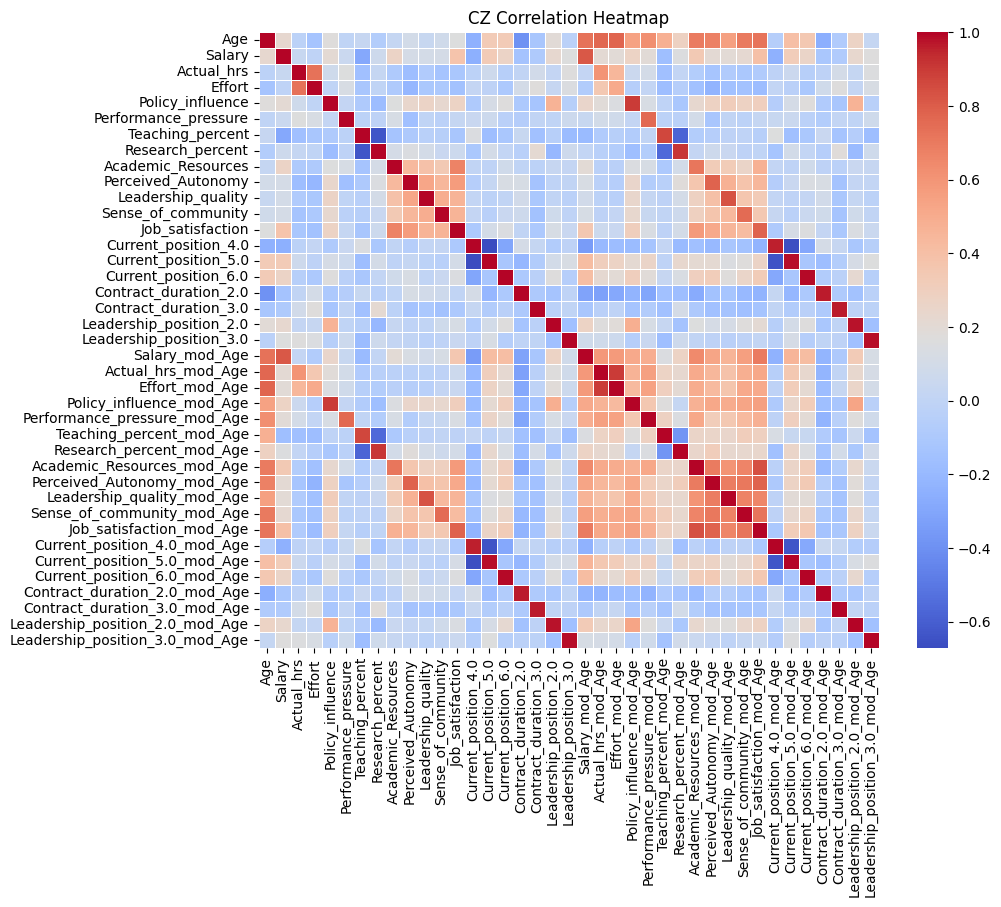

In [27]:
correlations = data_cz_formatted_academic_w_dummies.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('CZ Correlation Heatmap')

In [28]:
## Performing Variance Inflation Factor (VIF) analysis of the dataset:

Current_position_dummy_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'Current_position' in col and 'mod_Age' not in col]
## Taking the moderation coefficients separately:
Moderation_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'mod_Age' in col]
## Taking the remaining variables for working conditions:
Working_condition_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if col not in ['Job_satisfaction']+['Age']+Current_position_dummy_cols+Moderation_cols]

for cols in [Current_position_dummy_cols, Working_condition_cols, Moderation_cols]:
  if cols == Current_position_dummy_cols:
    print('Current Position:')
  elif cols == Working_condition_cols:
    print('Working Conditions:')
  elif cols == Moderation_cols:
    print('Age-Moderated Working Conditions:')
  X = data_cz_formatted_academic_w_dummies[cols].copy()
  X_const = add_constant(X)
  vif_data = pd.DataFrame()
  vif_data['Variable'] = X_const.columns
  vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

  print(vif_data)
  print('----------------------------------------')

Current Position:
               Variable       VIF
0                 const  9.034483
1  Current_position_4.0  2.495558
2  Current_position_5.0  2.304554
3  Current_position_6.0  1.390004
----------------------------------------
Working Conditions:
                   Variable         VIF
0                     const  159.186988
1                    Salary    1.300542
2                Actual_hrs    2.267365
3                    Effort    2.306538
4          Policy_influence    1.584325
5      Performance_pressure    1.107921
6          Teaching_percent    2.137625
7          Research_percent    2.124931
8        Academic_Resources    1.462011
9        Perceived_Autonomy    1.821066
10       Leadership_quality    1.680681
11       Sense_of_community    1.477133
12    Contract_duration_2.0    1.121650
13    Contract_duration_3.0    1.153067
14  Leadership_position_2.0    1.463584
15  Leadership_position_3.0    1.138696
----------------------------------------
Age-Moderated Working Conditio

## Calculating Cronbach's Alpha for the combined factors:

In [29]:
def Cronbach_alpha_func(data, label):
  col_nr = data.shape[1]

  item_variances = np.var(data, axis=0, ddof=1)
  total_var = np.var(np.sum(data, axis=1), ddof=1)
  alpha_cronbach = (col_nr/(col_nr-1))*(1-(np.sum(item_variances)/total_var))

  print(f'{label} Cronbach Alpha:', alpha_cronbach)
  return alpha_cronbach

In [30]:
## Academic Resources:

data_cz_for_alpha_academic = data_cz_job_w_inversion[(data_cz_job_w_inversion['Current_position'].isin([3., 4., 5., 6.])) &
                                                     (data_cz_job_w_inversion['Contract_duration']<5) &
                                                     (data_cz_job_w_inversion['Leadership_position']<4)].dropna()

values = data_cz_for_alpha_academic['Teaching_hrs']/data_cz_for_alpha_academic[['Teaching_hrs', 'Research_hrs', 'External_funding_hrs', 'Admin_hrs']].sum(axis=1)
data_cz_for_alpha_academic = data_cz_for_alpha_academic.drop(values[values.isna()].index)

print(len(data_cz_for_alpha_academic))

academic_resources_for_alpha = np.asarray(data_cz_for_alpha_academic[['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                         'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding']])

perceived_autonomy_for_alpha = np.asarray(data_cz_for_alpha_academic[['Be_myself', "Follow_commands", 'Do_differently',
                                                             'Want_to_do', 'Done_best', 'Forced_to_do']])

leadership_quality_for_alpha = np.asarray(data_cz_for_alpha_academic[['Development_opportunities', 'Prioritizes_satisfaction',
                                                             'Work_planning', 'Solving_conflicts']])

sense_of_community_for_alpha = np.asarray(data_cz_for_alpha_academic[['Good_atmosphere', 'Good_cooperation', 'Part_of_community']])

job_satisfaction_for_alpha = np.asarray(data_cz_for_alpha_academic[['Work_prospects', 'Physical_working_conditions',
                                                                      'Use_of_abilities', 'Satisfaction_w_salary',
                                                                      'Overall_satisfaction']])


acad_res_cron_alpha = Cronbach_alpha_func(academic_resources_for_alpha, 'Academic Resources')
perc_auton_cron_alpha = Cronbach_alpha_func(perceived_autonomy_for_alpha, 'Perceived Autonomy')
lead_qual_cron_alpha = Cronbach_alpha_func(leadership_quality_for_alpha, 'Leadership Quality')
sens_comm_cron_alpha = Cronbach_alpha_func(sense_of_community_for_alpha, 'Sense of Community')
print('---------------------')
job_sat_cron_alpha = Cronbach_alpha_func(job_satisfaction_for_alpha, 'Job Satisfaction')





524
Academic Resources Cronbach Alpha: 0.776208951976697
Perceived Autonomy Cronbach Alpha: 0.8687627264151738
Leadership Quality Cronbach Alpha: 0.9209291731579899
Sense of Community Cronbach Alpha: 0.8740290108348125
---------------------
Job Satisfaction Cronbach Alpha: 0.7666221498937273


## Structural Equation Modelling:

We study the relationship between academic position and job satisfaction, mediated by working conditions and moderated by age.

In [31]:
## Taking the response variable (Job satisfaction), the moderator variable (Age), and the predictor variable(s) (Current Position):
Job_satisfaction_col = ['Job_satisfaction']
Age_col = ['Age']
Current_position_dummy_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'Current_position' in col and 'mod_Age' not in col]

## Taking the moderation coefficients separately:
Moderation_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'mod_Age' in col]

## Taking the remaining variables for working conditions:
Working_condition_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if col not in Job_satisfaction_col+Age_col+Current_position_dummy_cols+Moderation_cols]

Working_condition_cols

['Salary',
 'Actual_hrs',
 'Effort',
 'Policy_influence',
 'Performance_pressure',
 'Teaching_percent',
 'Research_percent',
 'Academic_Resources',
 'Perceived_Autonomy',
 'Leadership_quality',
 'Sense_of_community',
 'Contract_duration_2.0',
 'Contract_duration_3.0',
 'Leadership_position_2.0',
 'Leadership_position_3.0']

In [32]:
Current_position_dummy_cols

['Current_position_4.0', 'Current_position_5.0', 'Current_position_6.0']

In [33]:
Moderation_cols

['Salary_mod_Age',
 'Actual_hrs_mod_Age',
 'Effort_mod_Age',
 'Policy_influence_mod_Age',
 'Performance_pressure_mod_Age',
 'Teaching_percent_mod_Age',
 'Research_percent_mod_Age',
 'Academic_Resources_mod_Age',
 'Perceived_Autonomy_mod_Age',
 'Leadership_quality_mod_Age',
 'Sense_of_community_mod_Age',
 'Job_satisfaction_mod_Age',
 'Current_position_4.0_mod_Age',
 'Current_position_5.0_mod_Age',
 'Current_position_6.0_mod_Age',
 'Contract_duration_2.0_mod_Age',
 'Contract_duration_3.0_mod_Age',
 'Leadership_position_2.0_mod_Age',
 'Leadership_position_3.0_mod_Age']

In [34]:
Current_position_factors = " + ".join(Current_position_dummy_cols)
Working_condition_factors = " + ".join(Working_condition_cols)
Moderation_factors = " + ".join(Moderation_cols)

path_no_mod = f"""
Salary ~ {Current_position_factors}
Actual_hrs ~ {Current_position_factors}
Effort ~ {Current_position_factors}
Policy_influence ~ {Current_position_factors}
Performance_pressure ~ {Current_position_factors}
Teaching_percent ~ {Current_position_factors}
Research_percent ~ {Current_position_factors}
Academic_Resources ~ {Current_position_factors}
Perceived_Autonomy ~ {Current_position_factors}
Leadership_quality ~ {Current_position_factors}
Sense_of_community ~ {Current_position_factors}
Contract_duration_2.0 ~ {Current_position_factors}
Contract_duration_3.0 ~ {Current_position_factors}
Leadership_position_2.0 ~ {Current_position_factors}
Leadership_position_3.0 ~ {Current_position_factors}
Job_satisfaction ~ {Working_condition_factors} + {Current_position_factors}
"""

## Maybe to add Contract_duration_4.0 ~ {Current_position_factors} back?


path = f"""
Salary ~ {Current_position_factors}
Actual_hrs ~ {Current_position_factors}
Effort ~ {Current_position_factors}
Policy_influence ~ {Current_position_factors}
Performance_pressure ~ {Current_position_factors}
Teaching_percent ~ {Current_position_factors}
Research_percent ~ {Current_position_factors}
Academic_Resources ~ {Current_position_factors}
Perceived_Autonomy ~ {Current_position_factors}
Leadership_quality ~ {Current_position_factors}
Sense_of_community ~ {Current_position_factors}
Contract_duration_2.0 ~ {Current_position_factors}
Contract_duration_3.0 ~ {Current_position_factors}
Leadership_position_2.0 ~ {Current_position_factors}
Leadership_position_3.0 ~ {Current_position_factors}
Job_satisfaction ~ {Working_condition_factors} + {Current_position_factors} + {Moderation_factors}
"""

print('Mediation/Moderation Path Model Specification:')
print(path)
print('-----------------------------------')


Mediation/Moderation Path Model Specification:

Salary ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Actual_hrs ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Effort ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Policy_influence ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Performance_pressure ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Teaching_percent ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Research_percent ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Academic_Resources ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Perceived_Autonomy ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Leadership_quality ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Sense_of_community ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Contract_duration_2.

In [35]:
model = semopy.Model(path)
result = model.fit(data_cz_formatted_academic_w_dummies)
print(result)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 48.908
Number of iterations: 255
Params: 1.285 3.621 5.021 0.421 1.590 -1.154 -3.458 -4.268 -11.563 0.401 0.745 1.341 0.383 0.473 0.204 -2.135 -10.815 -13.465 -2.679 2.002 -0.924 0.109 0.092 0.357 0.056 0.128 0.567 -0.016 -0.072 0.012 0.017 -0.075 0.193 -0.192 -0.418 -0.423 -0.030 -0.052 -0.052 0.115 0.207 0.410 0.090 0.170 0.020 0.045 -0.008 0.001 0.001 0.078 0.001 -0.001 0.333 0.294 0.067 0.061 0.072 -0.324 0.275 0.191 -0.127 0.093 0.251 -0.001 0.000 -0.000 -0.000 -0.002 -0.000 0.000 -0.007 -0.007 -0.001 -0.001 0.021 0.003 -0.002 -0.005 -0.002 0.009 -0.005 -0.004 0.521 59.868 0.195 0.019 324.824 0.009 0.135 0.096 1.347 0.716 0.959 1.324 307.195 6.106 0.917 334.097


In [36]:
## Evaluating the model fit:
if 'Optimization terminated successfully' in result.message:
    print('Optimization Successful')
    print('EVALUATION:')
    fit_evaluation = semopy.calc_stats(model)
    print(fit_evaluation.T)
    print('-'*25)

Optimization Successful
EVALUATION:
                      Value
DoF              643.000000
DoF Baseline     725.000000
chi2           25627.774752
chi2 p-value       0.000000
chi2 Baseline  39821.361846
CFI                0.360944
GFI                0.356431
AGFI               0.274359
NFI                0.356431
TLI                0.279447
RMSEA              0.272572
AIC               98.184066
BIC              515.810251
LogLik            48.907967
-------------------------


In [37]:
ins = model.inspect()
print(ins)
ins.to_csv('CZ_Model_Parameter_Values.csv')

                  lval  op                  rval    Estimate   Std. Err  \
0               Salary   ~  Current_position_4.0    1.285045   0.352061   
1               Salary   ~  Current_position_5.0    3.621469   0.399740   
2               Salary   ~  Current_position_6.0    5.020801   0.575691   
3           Actual_hrs   ~  Current_position_4.0    0.421440   1.102402   
4           Actual_hrs   ~  Current_position_5.0    1.590386   1.251697   
..                 ...  ..                   ...         ...        ...   
93    Research_percent  ~~      Research_percent  307.195351  18.978592   
94              Salary  ~~                Salary    6.105927   0.377225   
95  Sense_of_community  ~~    Sense_of_community    0.917266   0.056669   
96    Teaching_percent  ~~      Teaching_percent  334.097167  20.640592   
97    Job_satisfaction  ~~      Job_satisfaction    0.009387   0.000580   

      z-value   p-value  
0    3.650060  0.000262  
1    9.059568  0.000000  
2    8.721347  0.0000

In [38]:
print(ins[ins['p-value']<0.05])

                  lval  op                  rval    Estimate   Std. Err  \
0               Salary   ~  Current_position_4.0    1.285045   0.352061   
1               Salary   ~  Current_position_5.0    3.621469   0.399740   
2               Salary   ~  Current_position_6.0    5.020801   0.575691   
8               Effort   ~  Current_position_6.0  -11.562751   4.198917   
9     Policy_influence   ~  Current_position_4.0    0.401415   0.163935   
..                 ...  ..                   ...         ...        ...   
93    Research_percent  ~~      Research_percent  307.195351  18.978592   
94              Salary  ~~                Salary    6.105927   0.377225   
95  Sense_of_community  ~~    Sense_of_community    0.917266   0.056669   
96    Teaching_percent  ~~      Teaching_percent  334.097167  20.640592   
97    Job_satisfaction  ~~      Job_satisfaction    0.009387   0.000580   

      z-value   p-value  
0    3.650060  0.000262  
1    9.059568  0.000000  
2    8.721347  0.0000

In [39]:
significance = []

for i in range(len(ins)):
  if ins['p-value'].iloc[i] <= 0.001:
    significance.append('***')
  elif 0.001 < ins['p-value'].iloc[i] <= 0.01:
    significance.append('**')
  elif 0.01 < ins['p-value'].iloc[i] <= 0.05:
    significance.append('*')
  else:
    significance.append(' (n.s.)')

ins['Significance'] = significance

ins['Estimate w Significance'] = round(ins['Estimate'],5).astype(str) + ins['Significance']
ins

,lval,op,rval,Estimate,Std. Err,z-value,p-value,Significance,Estimate w Significance
0,Salary,~,Current_position_4.0,1.285045,0.352061,3.650060,0.000262,***,1.28504***
1,Salary,~,Current_position_5.0,3.621469,0.399740,9.059568,0.000000,***,3.62147***
2,Salary,~,Current_position_6.0,5.020801,0.575691,8.721347,0.000000,***,5.0208***
3,Actual_hrs,~,Current_position_4.0,0.421440,1.102402,0.382292,0.702245,(n.s.),0.42144 (n.s.)
4,Actual_hrs,~,Current_position_5.0,1.590386,1.251697,1.270584,0.203877,(n.s.),1.59039 (n.s.)
...,...,...,...,...,...,...,...,...,...
93,Research_percent,~~,Research_percent,307.195351,18.978592,16.186414,0.000000,***,307.19535***
94,Salary,~~,Salary,6.105927,0.377225,16.186414,0.000000,***,6.10593***
95,Sense_of_community,~~,Sense_of_community,0.917266,0.056669,16.186414,0.000000,***,0.91727***
96,Teaching_percent,~~,Teaching_percent,334.097167,20.640592,16.186414,0.000000,***,334.09717***


In [40]:

## Saving the Job Position pathway coefficients for the SEM:
job_pos_paths = pd.DataFrame()
job_pos_paths['lval'] = ins['lval'][ins['rval']==Current_position_dummy_cols[0]]

for curr_pos in Current_position_dummy_cols:
  job_pos_paths = pd.merge(job_pos_paths, ins[['lval', 'Estimate w Significance']][ins['rval']==curr_pos], on='lval', how='left')
  job_pos_paths.rename(columns={job_pos_paths.columns[-1]: curr_pos}, inplace=True)

job_pos_paths


## Saving the Working Conditions pathway coefficients for the SEM:
work_cond_paths = pd.DataFrame()
work_cond_paths['lval'] = [ins['lval'][ins['rval']==Working_condition_cols[0]].iloc[0]]

for work_cond in Working_condition_cols:
  work_cond_paths = pd.merge(work_cond_paths, ins[['lval', 'Estimate w Significance']][ins['rval']==work_cond], on='lval', how='left')
  work_cond_paths.rename(columns={work_cond_paths.columns[-1]: work_cond}, inplace=True)

work_cond_paths


# ## Saving the moderator pathway coefficients for the SEM:
mod_age_paths = pd.DataFrame()
mod_age_paths['lval'] = [ins['lval'][ins['rval']==Moderation_cols[0]].iloc[0]]

for mod_age in Moderation_cols:
  mod_age_paths = pd.merge(mod_age_paths, ins[['lval', 'Estimate w Significance']][ins['rval']==mod_age], on='lval', how='left')
  mod_age_paths.rename(columns={mod_age_paths.columns[-1]: mod_age}, inplace=True)


job_pos_paths.set_index('lval')



,Current_position_4.0,Current_position_5.0,Current_position_6.0
lval,,,
Salary,1.28504***,3.62147***,5.0208***
Actual_hrs,0.42144 (n.s.),1.59039 (n.s.),-1.15376 (n.s.)
Effort,-3.45785 (n.s.),-4.26807 (n.s.),-11.56275**
Policy_influence,0.40141*,0.74472***,1.341***
Performance_pressure,0.38343**,0.47321**,0.2037 (n.s.)
Teaching_percent,-2.13543 (n.s.),-10.81468***,-13.46481**
Research_percent,-2.67875 (n.s.),2.00245 (n.s.),-0.92432 (n.s.)
Academic_Resources,0.10872 (n.s.),0.09154 (n.s.),0.35656*
Perceived_Autonomy,0.05628 (n.s.),0.12772 (n.s.),0.56651**


In [41]:
work_cond_paths.set_index('lval').T

lval,Job_satisfaction
Salary,0.04508***
Actual_hrs,-0.00774***
Effort,0.00127***
Policy_influence,0.00092 (n.s.)
Performance_pressure,0.07782***
Teaching_percent,0.00083***
Research_percent,-0.00147***
Academic_Resources,0.33294***
Perceived_Autonomy,0.29363***
Leadership_quality,0.06665***


In [42]:
mod_age_paths.set_index('lval').T

lval,Job_satisfaction
Salary_mod_Age,-0.00098***
Actual_hrs_mod_Age,0.00016***
Effort_mod_Age,-3e-05***
Policy_influence_mod_Age,-0.00016 (n.s.)
Performance_pressure_mod_Age,-0.00181***
Teaching_percent_mod_Age,-4e-05***
Research_percent_mod_Age,3e-05***
Academic_Resources_mod_Age,-0.0073***
Perceived_Autonomy_mod_Age,-0.00658***
Leadership_quality_mod_Age,-0.00143***


In [43]:
med_mod_path_values = pd.DataFrame(columns = ['Current_position']+Working_condition_cols)

for curr_pos in Current_position_dummy_cols:
  path_coeff = [curr_pos]
  for work_cond in Working_condition_cols:
    path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                      (ins['lval']==work_cond)].iloc[0]) * float(ins['Estimate'][(ins['rval']==work_cond) &
                       (ins['lval']=='Job_satisfaction')].iloc[0]))
  med_mod_path_values.loc[len(med_mod_path_values)] = path_coeff
med_mod_path_values

,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0
0,Current_position_4.0,0.057932,-0.003263,-0.004392,0.000368,0.029837,-0.001762,0.003929,0.036198,0.016525,-0.001056,0.001066,-0.013892,0.009820,0.031736,0.017139
1,Current_position_5.0,0.163262,-0.012313,-0.005421,0.000683,0.036824,-0.008925,-0.002937,0.030477,0.037502,-0.004786,-0.004570,-0.030277,0.016755,0.056824,0.032498
2,Current_position_6.0,0.226346,0.008933,-0.014687,0.001230,0.015851,-0.011112,0.001356,0.118710,0.166344,0.000768,0.011750,-0.030636,0.016755,0.112763,0.003777


## Performing Sobel Test for indirect effects:

In [44]:
Sobel_z_stat_df  = pd.DataFrame(columns = ['Current_Position'] + Working_condition_cols)
Sobel_p_val_df  = pd.DataFrame(columns = ['Current_Position'] + Working_condition_cols)

for curr_pos in Current_position_dummy_cols:
  Sobel_z = [curr_pos]
  Sobel_p = [curr_pos]
  for work_cond in Working_condition_cols:
    JP_WC_mean = float(ins['Estimate'][(ins['rval']==curr_pos) & (ins['lval']==work_cond)].iloc[0])  ## The coefficient between Job Position and Working Condition
    JP_WC_std = float(ins['Std. Err'][(ins['rval']==curr_pos) & (ins['lval']==work_cond)].iloc[0])  ## The coeff standard deviation between Job Position and Working Condition
    WC_JS_mean = float(ins['Estimate'][(ins['rval']==work_cond) & (ins['lval']=='Job_satisfaction')].iloc[0]) ## The coefficient between Working Condition and Job Satisfaction
    WC_JS_std = float(ins['Std. Err'][(ins['rval']==work_cond) & (ins['lval']=='Job_satisfaction')].iloc[0]) ## The coeff standard deviation between Working Condition and Job Satisfaction
    ## Calculating Sobel Z-value statistic:
    z_value = (JP_WC_mean*WC_JS_mean)/np.sqrt(JP_WC_mean**2 * WC_JS_std**2 + WC_JS_mean**2 * JP_WC_std**2)

    ## Calculating two-tailed Sobel p-value:
    p_value_two_tailed = 2 * norm.sf(abs(z_value))

    if p_value_two_tailed<=0.001:
      sig = '***'
    elif p_value_two_tailed <= 0.01:
      sig = '**'
    elif p_value_two_tailed <= 0.05:
      sig = '*'
    else:
      sig = ' (n.s.)'
    Sobel_z.append(round(z_value,4).astype(str)+sig)
    Sobel_p.append(p_value_two_tailed)

  Sobel_z_stat_df.loc[len(Sobel_z_stat_df)] = Sobel_z
  Sobel_p_val_df.loc[len(Sobel_p_val_df)] = Sobel_p

Sobel_z_stat_df


,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0
0,Current_position_4.0,3.6155***,-0.3822 (n.s.),-1.3067 (n.s.),0.2481 (n.s.),2.7164**,-0.7991 (n.s.),1.0564 (n.s.),1.0568 (n.s.),0.4667 (n.s.),-0.0958 (n.s.),0.1282 (n.s.),-2.8286**,1.547 (n.s.),2.195*,2.0136*
1,Current_position_5.0,8.5663***,-1.2655 (n.s.),-1.413 (n.s.),0.2489 (n.s.),2.9465**,-2.5525*,-0.7015 (n.s.),0.7837 (n.s.),0.9328 (n.s.),-0.3824 (n.s.),-0.4838 (n.s.),-4.6275***,2.293*,3.4399***,3.3019***
2,Current_position_6.0,8.2787***,0.6394 (n.s.),-2.454*,0.2491 (n.s.),0.8916 (n.s.),-2.3653*,0.2262 (n.s.),2.1183*,2.87**,0.0426 (n.s.),0.8625 (n.s.),-3.6129***,1.6126 (n.s.),4.6962***,0.2742 (n.s.)


In [45]:
Sobel_z_stat_df.set_index('Current_Position').T

Current_Position,Current_position_4.0,Current_position_5.0,Current_position_6.0
Salary,3.6155***,8.5663***,8.2787***
Actual_hrs,-0.3822 (n.s.),-1.2655 (n.s.),0.6394 (n.s.)
Effort,-1.3067 (n.s.),-1.413 (n.s.),-2.454*
Policy_influence,0.2481 (n.s.),0.2489 (n.s.),0.2491 (n.s.)
Performance_pressure,2.7164**,2.9465**,0.8916 (n.s.)
Teaching_percent,-0.7991 (n.s.),-2.5525*,-2.3653*
Research_percent,1.0564 (n.s.),-0.7015 (n.s.),0.2262 (n.s.)
Academic_Resources,1.0568 (n.s.),0.7837 (n.s.),2.1183*
Perceived_Autonomy,0.4667 (n.s.),0.9328 (n.s.),2.87**
Leadership_quality,-0.0958 (n.s.),-0.3824 (n.s.),0.0426 (n.s.)


In [46]:
Sobel_p_val_df.set_index('Current_Position').T

Current_Position,Current_position_4.0,Current_position_5.0,Current_position_6.0
Salary,0.000300,1.068823e-17,1.245617e-16
Actual_hrs,0.702348,2.056938e-01,5.225757e-01
Effort,0.191310,1.576422e-01,1.412737e-02
Policy_influence,0.804058,8.034389e-01,8.033045e-01
Performance_pressure,0.006601,3.213990e-03,3.725880e-01
Teaching_percent,0.424227,1.069419e-02,1.801734e-02
Research_percent,0.290803,4.829823e-01,8.210422e-01
Academic_Resources,0.290602,4.332165e-01,3.414696e-02
Perceived_Autonomy,0.640679,3.509051e-01,4.105183e-03
Leadership_quality,0.923660,7.021340e-01,9.659869e-01


In [47]:
## Path Modelling with no age moderation:
model_no_mod = semopy.Model(path_no_mod)
result_no_mod = model_no_mod.fit(data_cz_formatted_academic_w_dummies)
print(result_no_mod)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 3.466
Number of iterations: 193
Params: 1.285 3.622 5.021 0.682 1.876 -0.649 -3.441 -4.192 -11.734 0.401 0.745 1.341 0.383 0.473 0.204 -2.289 -10.978 -13.832 -3.178 1.287 -0.261 0.109 0.092 0.357 0.056 0.128 0.566 -0.016 -0.072 0.011 0.018 -0.075 0.193 -0.192 -0.418 -0.423 -0.030 -0.052 -0.052 0.115 0.207 0.410 0.090 0.170 0.020 0.055 0.001 -0.002 0.021 0.012 0.001 -0.001 0.457 0.243 0.038 0.112 0.009 0.071 0.086 0.049 -0.060 0.024 -0.001 0.521 59.783 0.195 0.019 324.525 0.231 0.135 0.096 1.347 0.716 0.959 1.324 307.454 6.106 0.917 333.202


In [48]:
if 'Optimization terminated successfully' in result_no_mod.message:
    print('Optimization Successful')
    print('EVALUATION:')
    fit_evaluation_no_mod = semopy.calc_stats(model_no_mod)
    print(fit_evaluation_no_mod.T)
    print('-'*25)

Optimization Successful
EVALUATION:
                     Value
DoF             111.000000
DoF Baseline    174.000000
chi2           1816.340738
chi2 p-value      0.000000
chi2 Baseline  3137.440459
CFI               0.424540
GFI               0.421076
AGFI              0.092497
NFI               0.421076
TLI               0.097928
RMSEA             0.171393
AIC             151.067402
BIC             487.725245
LogLik            3.466299
-------------------------


In [49]:
ins_no_mod = model_no_mod.inspect()
print(ins_no_mod)
ins.to_csv('CZ_No_Mod_Model_Parameter_Values.csv')

                  lval  op                  rval    Estimate   Std. Err  \
0               Salary   ~  Current_position_4.0    1.285092   0.352062   
1               Salary   ~  Current_position_5.0    3.621503   0.399741   
2               Salary   ~  Current_position_6.0    5.020937   0.575692   
3           Actual_hrs   ~  Current_position_4.0    0.682334   1.101621   
4           Actual_hrs   ~  Current_position_5.0    1.875837   1.250810   
..                 ...  ..                   ...         ...        ...   
74    Research_percent  ~~      Research_percent  307.453995  18.994571   
75              Salary  ~~                Salary    6.105954   0.377227   
76  Sense_of_community  ~~    Sense_of_community    0.917279   0.056670   
77    Teaching_percent  ~~      Teaching_percent  333.202133  20.585297   
78    Job_satisfaction  ~~      Job_satisfaction    0.231058   0.014275   

      z-value   p-value  
0    3.650187  0.000262  
1    9.059633  0.000000  
2    8.721566  0.0000

## Comparing the pathway coefficients for significant moderation effect:

In [50]:
Moderation_comparison_df = pd.DataFrame()

med_mean = []
med_std = []
med_no_mod_mean = []
med_no_mod_std = []
significance = []
significance_difference = []
for work_cond in Working_condition_cols+Current_position_dummy_cols:
    WC_JS_mean = float(ins['Estimate'][(ins['rval']==work_cond) & (ins['lval']=='Job_satisfaction')].iloc[0])
    WC_JS_std = float(ins['Std. Err'][(ins['rval']==work_cond) & (ins['lval']=='Job_satisfaction')].iloc[0])
    WC_JS_no_mod_mean = float(ins_no_mod['Estimate'][(ins_no_mod['rval']==work_cond) & (ins_no_mod['lval']=='Job_satisfaction')].iloc[0])
    WC_JS_no_mod_std = float(ins_no_mod['Std. Err'][(ins_no_mod['rval']==work_cond) & (ins_no_mod['lval']=='Job_satisfaction')].iloc[0])
    med_mean.append(WC_JS_mean)
    med_std.append(WC_JS_std)
    med_no_mod_mean.append(WC_JS_no_mod_mean)
    med_no_mod_std.append(WC_JS_no_mod_std)

    ## Checking for significance:
    med_lbound = WC_JS_mean - 1.96*WC_JS_std
    med_ubound = WC_JS_mean + 1.96*WC_JS_std

    med_no_mod_lbound = WC_JS_no_mod_mean - 1.96*WC_JS_no_mod_std
    med_no_mod_ubound = WC_JS_no_mod_mean + 1.96*WC_JS_no_mod_std

    if med_lbound <=0 and med_ubound >=0:
      significance.append('Not Significant')
    else:
      significance.append('Significant')

    ## Checking if the difference between moderated and non-moderated models is significance:
    if med_lbound > med_no_mod_ubound or med_ubound < med_no_mod_lbound:
      significance_difference.append('Significant')
    else:
      significance_difference.append('Not Significant')

Moderation_comparison_df['Working Condition'] = Working_condition_cols+Current_position_dummy_cols
Moderation_comparison_df['Mediation Mean'] = med_mean
Moderation_comparison_df['Mediation StDev'] = med_std
Moderation_comparison_df['Mediation (No Mod) Mean'] = med_no_mod_mean
Moderation_comparison_df['Mediation (No Mod) StDev'] = med_no_mod_std
# Moderation_comparison_df['Mediation Significance'] = significance
Moderation_comparison_df['Moderation Significance'] = significance_difference

Moderation_comparison_df

,Working Condition,Mediation Mean,Mediation StDev,Mediation (No Mod) Mean,Mediation (No Mod) StDev,Moderation Significance
0,Salary,0.045082,0.001713,0.054506,0.008498,Not Significant
1,Actual_hrs,-0.007742,0.000547,0.000547,0.002716,Significant
2,Effort,0.001270,0.000235,-0.001643,0.001166,Significant
3,Policy_influence,0.000917,0.003679,0.020553,0.018250,Not Significant
4,Performance_pressure,0.077817,0.004322,0.011532,0.021441,Significant
5,Teaching_percent,0.000825,0.000232,0.001268,0.001150,Not Significant
6,Research_percent,-0.001467,0.000241,-0.000989,0.001198,Not Significant
7,Academic_Resources,0.332935,0.005863,0.456904,0.029085,Significant
8,Perceived_Autonomy,0.293631,0.005002,0.242761,0.024814,Not Significant
9,Leadership_quality,0.066646,0.003647,0.037896,0.018095,Not Significant


## Bootstrapping:

In [ ]:
times = 200

Evaluation_cols = ['DoF', 'DoF Baseline', 'chi2', 'chi2 p-value', 'chi2 Baseline', 'CFI',
                   'GFI', 'AGFI', 'NFI', 'TLI', 'RMSEA', 'AIC', 'BIC', 'LogLik']


bootstrap_path_values = pd.DataFrame(columns = ['Bootstrap_nr', 'Current_position']+Working_condition_cols+['Job_satisfaction']+Evaluation_cols)
mediation_path_values = pd.DataFrame(columns = ['Bootstrap_nr']+Working_condition_cols+Evaluation_cols)
moderation_path_values = pd.DataFrame(columns = ['Bootstrap_nr']+Moderation_cols+Evaluation_cols)
bootstrap_path_values_no_mod = pd.DataFrame(columns = ['Bootstrap_nr', 'Current_position']+Working_condition_cols+['Job_satisfaction']+Evaluation_cols)
mediation_path_values_no_mod = pd.DataFrame(columns = ['Bootstrap_nr']+Working_condition_cols+Evaluation_cols)

model = semopy.Model(path)
model_no_mod = semopy.Model(path_no_mod)

for i in range(times):
  if i % 10 ==0:
    print(f'Run: {i}/{times}')
  data_cz_bootstrapped = data_cz_formatted_academic_w_dummies.sample(n=len(data_cz_formatted_academic_w_dummies), replace=True, random_state=i).reset_index(drop=True)

  # model = semopy.Model(path)
  result = model.fit(data_cz_bootstrapped)
  ins = model.inspect()
  # model_no_mod = semopy.Model(path_no_mod)
  result_no_mod = model_no_mod.fit(data_cz_bootstrapped)
  ins_no_mod = model_no_mod.inspect()

  if 'Optimization terminated successfully' in result.message and 'Optimization terminated successfully' in result_no_mod.message:
    # print('Optimization Successful')

    ## ---------------- Returning the full indirect path fits for the path model with Age moderation: ----------------------
    fit_evaluation = semopy.calc_stats(model)
    # print('EVALUATION (Chi2 p-value):', float(fit_evaluation['chi2 p-value'].iloc[0]))

    for curr_pos in Current_position_dummy_cols:
      path_coeff = [i, curr_pos]
      for work_cond in Working_condition_cols:
        path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                          (ins['lval']==work_cond)].iloc[0]) * float(ins['Estimate'][(ins['rval']==work_cond) &
                          (ins['lval']=='Job_satisfaction')].iloc[0]))
      path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                          (ins['lval']=='Job_satisfaction')].iloc[0]))
      path_coeff = path_coeff + fit_evaluation.iloc[0].tolist()
      bootstrap_path_values.loc[len(bootstrap_path_values)] = path_coeff

    ## Printing the mediation pathways with Age moderation:
    med_coeff = [i]
    for work_cond in Working_condition_cols:
        med_coeff.append(float(ins['Estimate'][(ins['rval']==work_cond) &
                          (ins['lval']=='Job_satisfaction')].iloc[0]))
    med_coeff = med_coeff + fit_evaluation.iloc[0].tolist()
    mediation_path_values.loc[len(mediation_path_values)] = med_coeff

    ## Printing the moderation coefficients for Age moderation:
    mod_coeff = [i]
    for mod_element in Moderation_cols:
        mod_coeff.append(float(ins['Estimate'][(ins['rval']==mod_element) &
                          (ins['lval']=='Job_satisfaction')].iloc[0]))
    mod_coeff = mod_coeff + fit_evaluation.iloc[0].tolist()
    moderation_path_values.loc[len(moderation_path_values)] = mod_coeff


    ## ---------------- Returning the full indirect path fits for the path model without Age moderation: ----------------------
    fit_evaluation_no_mod = semopy.calc_stats(model_no_mod)
    # print('EVALUATION NO MOD (Chi2 p-value):', float(fit_evaluation_no_mod['chi2 p-value'].iloc[0]))

    for curr_pos in Current_position_dummy_cols:
      path_coeff_no_mod = [i, curr_pos]
      for work_cond in Working_condition_cols:
        path_coeff_no_mod.append(float(ins_no_mod['Estimate'][(ins_no_mod['rval']==curr_pos) &
                          (ins_no_mod['lval']==work_cond)].iloc[0]) * float(ins_no_mod['Estimate'][(ins_no_mod['rval']==work_cond) &
                          (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]))
      path_coeff_no_mod.append(float(ins_no_mod['Estimate'][(ins_no_mod['rval']==curr_pos) &
                          (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]))
      path_coeff_no_mod = path_coeff_no_mod + fit_evaluation_no_mod.iloc[0].tolist()
      bootstrap_path_values_no_mod.loc[len(bootstrap_path_values_no_mod)] = path_coeff_no_mod

    ## Printing the mediation pathways without Age moderation:
    med_coeff_no_mod = [i]
    for work_cond in Working_condition_cols:
        med_coeff_no_mod.append(float(ins_no_mod['Estimate'][(ins_no_mod['rval']==work_cond) &
                          (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]))
    med_coeff_no_mod = med_coeff_no_mod + fit_evaluation_no_mod.iloc[0].tolist()
    mediation_path_values_no_mod.loc[len(mediation_path_values_no_mod)] = med_coeff_no_mod

  else:
    print('Run:', i)
    print('Optimization Unsuccessful')

bootstrap_path_values

Run: 0/200
Run: 10/200
Run: 20/200
Run: 30/200
Run: 40/200
Run: 50/200
Run: 60/200
Run: 70/200
Run: 80/200
Run: 90/200
Run: 100/200
Run: 110/200
Run: 120/200
Run: 130/200
Run: 140/200
Run: 150/200
Run: 160/200
Run: 170/200
Run: 180/200
Run: 190/200


,Bootstrap_nr,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Current_position_4.0,0.052523,0.004119,0.007471,-0.017792,0.017761,0.017651,-0.002794,0.075800,...,58027.700826,0.346307,0.343394,0.259658,0.343394,0.262944,0.269012,101.455684,561.279891,47.272158
1,0,Current_position_5.0,0.161886,0.008752,0.007935,-0.031349,0.027730,0.036609,-0.009307,0.155984,...,58027.700826,0.346307,0.343394,0.259658,0.343394,0.262944,0.269012,101.455684,561.279891,47.272158
2,0,Current_position_6.0,0.257570,0.012823,0.003970,-0.037493,0.025322,0.055717,-0.027346,0.237894,...,58027.700826,0.346307,0.343394,0.259658,0.343394,0.262944,0.269012,101.455684,561.279891,47.272158
3,1,Current_position_4.0,0.068821,0.009733,0.001267,-0.015012,0.018221,-0.001132,0.012689,-0.001473,...,59206.927965,0.323457,0.320881,0.234275,0.320881,0.237180,0.276474,96.226981,556.051188,49.886509
4,1,Current_position_5.0,0.222771,0.022623,0.003208,-0.037949,0.021301,0.007751,0.004183,0.029973,...,59206.927965,0.323457,0.320881,0.234275,0.320881,0.237180,0.276474,96.226981,556.051188,49.886509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,198,Current_position_5.0,0.252420,0.060804,0.006142,-0.047678,0.029641,0.034955,0.001241,0.084232,...,59297.007093,0.325008,0.322417,0.236007,0.322417,0.238928,0.276370,96.301133,556.125340,49.849433
596,198,Current_position_6.0,0.319140,0.047115,0.009949,-0.053602,0.018726,0.058343,-0.008904,0.227876,...,59297.007093,0.325008,0.322417,0.236007,0.322417,0.238928,0.276370,96.301133,556.125340,49.849433
597,199,Current_position_4.0,0.050868,0.005573,-0.002737,-0.005099,-0.001055,0.009328,-0.001350,0.096165,...,58609.982940,0.330449,0.327760,0.242032,0.327760,0.245063,0.273635,98.233376,558.057583,48.883312
598,199,Current_position_5.0,0.199670,0.009453,-0.001049,-0.009788,-0.001400,0.022181,-0.013019,0.164180,...,58609.982940,0.330449,0.327760,0.242032,0.327760,0.245063,0.273635,98.233376,558.057583,48.883312


In [ ]:
bootstrap_path_values.to_csv('CZ_bootstrap_path_values.csv')
mediation_path_values.to_csv('CZ_mediation_path_values.csv')
moderation_path_values.to_csv('CZ_moderation_path_values.csv')
bootstrap_path_values_no_mod.to_csv('CZ_bootstrap_path_values_no_mod.csv')
mediation_path_values_no_mod.to_csv('CZ_mediation_path_values_no_mod.csv')

In [ ]:
path_to_bootstrap = 'https://raw.githubusercontent.com/AndreiAf02/Job-Satisfaction/refs/heads/main/CZ_bootstrap/'

bootstrap_path_values = pd.read_csv(path_to_bootstrap+'CZ_bootstrap_path_values.csv', sep=",", header=0).iloc[:,1:]
mediation_path_values = pd.read_csv(path_to_bootstrap+'CZ_mediation_path_values.csv', sep=",", header=0).iloc[:,1:]
moderation_path_values = pd.read_csv(path_to_bootstrap+'CZ_moderation_path_values.csv', sep=",", header=0).iloc[:,1:]
bootstrap_path_values_no_mod = pd.read_csv(path_to_bootstrap+'CZ_bootstrap_path_values_no_mod.csv', sep=",", header=0).iloc[:,1:]
mediation_path_values_no_mod = pd.read_csv(path_to_bootstrap+'CZ_mediation_path_values_no_mod.csv', sep=",", header=0).iloc[:,1:]


In [ ]:
bootstrap_path_values

,Bootstrap_nr,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Current_position_4.0,0.052523,0.004119,0.007471,-0.017792,0.017761,0.017651,-0.002794,0.075800,...,58027.700826,0.346307,0.343394,0.259658,0.343394,0.262944,0.269012,101.455684,561.279891,47.272158
1,0,Current_position_5.0,0.161886,0.008752,0.007935,-0.031349,0.027730,0.036609,-0.009307,0.155984,...,58027.700826,0.346307,0.343394,0.259658,0.343394,0.262944,0.269012,101.455684,561.279891,47.272158
2,0,Current_position_6.0,0.257570,0.012823,0.003970,-0.037493,0.025322,0.055717,-0.027346,0.237894,...,58027.700826,0.346307,0.343394,0.259658,0.343394,0.262944,0.269012,101.455684,561.279891,47.272158
3,1,Current_position_4.0,0.068821,0.009733,0.001267,-0.015012,0.018221,-0.001132,0.012689,-0.001473,...,59206.927965,0.323457,0.320881,0.234275,0.320881,0.237180,0.276474,96.226981,556.051188,49.886509
4,1,Current_position_5.0,0.222771,0.022623,0.003208,-0.037949,0.021301,0.007751,0.004183,0.029973,...,59206.927965,0.323457,0.320881,0.234275,0.320881,0.237180,0.276474,96.226981,556.051188,49.886509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,198,Current_position_5.0,0.252420,0.060804,0.006142,-0.047678,0.029641,0.034955,0.001241,0.084232,...,59297.007093,0.325008,0.322417,0.236007,0.322417,0.238928,0.276370,96.301133,556.125340,49.849433
596,198,Current_position_6.0,0.319140,0.047115,0.009949,-0.053602,0.018726,0.058343,-0.008904,0.227876,...,59297.007093,0.325008,0.322417,0.236007,0.322417,0.238928,0.276370,96.301133,556.125340,49.849433
597,199,Current_position_4.0,0.050868,0.005573,-0.002737,-0.005099,-0.001055,0.009328,-0.001350,0.096165,...,58609.982940,0.330449,0.327760,0.242032,0.327760,0.245063,0.273635,98.233376,558.057583,48.883312
598,199,Current_position_5.0,0.199670,0.009453,-0.001049,-0.009788,-0.001400,0.022181,-0.013019,0.164180,...,58609.982940,0.330449,0.327760,0.242032,0.327760,0.245063,0.273635,98.233376,558.057583,48.883312


In [ ]:
mediation_path_values

,Bootstrap_nr,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0.0,0.029858,0.001472,-0.001149,-0.030829,0.043808,-0.002489,-0.005947,0.480699,0.299390,...,58027.700826,0.346307,0.343394,0.259658,0.343394,0.262944,0.269012,101.455684,561.279891,47.272158
1,1.0,0.037636,0.003306,-0.001742,-0.040158,0.070538,-0.000981,-0.003003,0.413230,0.201640,...,59206.927965,0.323457,0.320881,0.234275,0.320881,0.237180,0.276474,96.226981,556.051188,49.886509
2,2.0,0.038498,-0.001292,-0.002107,0.014995,0.075612,-0.002372,-0.004080,0.390599,0.275701,...,59413.383045,0.318877,0.316366,0.229184,0.316366,0.232015,0.277898,95.213354,555.037561,50.393323
3,3.0,0.023949,-0.000869,-0.000385,0.011183,0.027683,-0.002275,-0.005073,0.478562,0.208911,...,57577.646642,0.341571,0.338694,0.254360,0.338694,0.257603,0.268922,101.517527,561.341734,47.241236
4,4.0,0.044359,-0.000997,-0.001768,0.015485,0.041832,-0.000528,-0.000030,0.425493,0.274928,...,59290.571441,0.325737,0.323137,0.236818,0.323137,0.239750,0.276206,96.417808,556.242015,49.791096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195.0,0.035630,0.003961,-0.001048,-0.005789,-0.049486,0.000189,0.000557,0.522048,0.140090,...,57950.445617,0.338182,0.335366,0.250607,0.335366,0.253782,0.270496,100.427257,560.251463,47.786372
196,196.0,0.045017,0.001675,-0.004047,0.013663,0.085868,-0.001858,-0.006632,0.442902,0.321212,...,58542.541350,0.322556,0.319962,0.233238,0.319962,0.236163,0.275083,97.212994,557.037200,49.393503
197,197.0,0.034943,0.004336,-0.001830,-0.029548,0.056795,-0.003830,-0.007873,0.498758,0.272759,...,58474.332036,0.329412,0.326730,0.240869,0.326730,0.243893,0.273526,98.310102,558.134309,48.844949
198,198.0,0.046405,0.007022,-0.001058,-0.044477,0.064568,-0.002948,-0.004595,0.425318,0.233684,...,59297.007093,0.325008,0.322417,0.236007,0.322417,0.238928,0.276370,96.301133,556.125340,49.849433


In [ ]:
moderation_path_values

,Bootstrap_nr,Salary_mod_Age,Actual_hrs_mod_Age,Effort_mod_Age,Policy_influence_mod_Age,Performance_pressure_mod_Age,Teaching_percent_mod_Age,Research_percent_mod_Age,Academic_Resources_mod_Age,Perceived_Autonomy_mod_Age,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0.0,-0.000651,-0.000045,0.000025,0.000568,-0.001022,0.000029,0.000126,-0.010337,-0.006715,...,58027.700826,0.346307,0.343394,0.259658,0.343394,0.262944,0.269012,101.455684,561.279891,47.272158
1,1.0,-0.000773,-0.000086,0.000037,0.000832,-0.001505,-0.000003,0.000066,-0.009255,-0.004684,...,59206.927965,0.323457,0.320881,0.234275,0.320881,0.237180,0.276474,96.226981,556.051188,49.886509
2,2.0,-0.000849,0.000019,0.000048,-0.000342,-0.001698,0.000032,0.000083,-0.008577,-0.006163,...,59413.383045,0.318877,0.316366,0.229184,0.316366,0.232015,0.277898,95.213354,555.037561,50.393323
3,3.0,-0.000474,0.000009,0.000010,-0.000342,-0.000694,0.000037,0.000111,-0.010377,-0.004647,...,57577.646642,0.341571,0.338694,0.254360,0.338694,0.257603,0.268922,101.517527,561.341734,47.241236
4,4.0,-0.000944,0.000021,0.000041,-0.000388,-0.001084,-0.000003,-0.000006,-0.008987,-0.006194,...,59290.571441,0.325737,0.323137,0.236818,0.323137,0.239750,0.276206,96.417808,556.242015,49.791096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195.0,-0.000726,-0.000084,0.000017,0.000091,0.000984,-0.000017,-0.000014,-0.011220,-0.003068,...,57950.445617,0.338182,0.335366,0.250607,0.335366,0.253782,0.270496,100.427257,560.251463,47.786372
196,196.0,-0.000921,-0.000019,0.000085,-0.000530,-0.001934,0.000021,0.000145,-0.009278,-0.007169,...,58542.541350,0.322556,0.319962,0.233238,0.319962,0.236163,0.275083,97.212994,557.037200,49.393503
197,197.0,-0.000757,-0.000086,0.000040,0.000652,-0.001244,0.000079,0.000175,-0.010699,-0.005926,...,58474.332036,0.329412,0.326730,0.240869,0.326730,0.243893,0.273526,98.310102,558.134309,48.844949
198,198.0,-0.001001,-0.000164,0.000025,0.000850,-0.001185,0.000047,0.000098,-0.009319,-0.004869,...,59297.007093,0.325008,0.322417,0.236007,0.322417,0.238928,0.276370,96.301133,556.125340,49.849433


In [ ]:
bootstrap_path_values_no_mod

,Bootstrap_nr,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Current_position_4.0,0.015079,0.003394,0.005740,-0.002115,-0.000617,0.015345,-0.001255,0.079831,...,4216.908889,0.474546,0.469905,0.169040,0.469905,0.176315,0.154190,152.453190,523.127806,2.773405
1,0,Current_position_5.0,0.046481,0.007215,0.006096,-0.003727,-0.000964,0.031840,-0.004177,0.164287,...,4216.908889,0.474546,0.469905,0.169040,0.469905,0.176315,0.154190,152.453190,523.127806,2.773405
2,0,Current_position_6.0,0.073956,0.010571,0.003061,-0.004457,-0.000880,0.048508,-0.012286,0.250522,...,4216.908889,0.474546,0.469905,0.169040,0.469905,0.176315,0.154190,152.453190,523.127806,2.773405
3,1,Current_position_4.0,0.025943,0.008383,0.000867,0.000970,0.003646,-0.002127,0.003779,-0.001780,...,4204.695283,0.473765,0.469143,0.167846,0.469143,0.175091,0.154071,152.461310,523.135926,2.769345
4,1,Current_position_5.0,0.083976,0.019494,0.002060,0.002453,0.004263,0.014617,0.001255,0.036215,...,4204.695283,0.473765,0.469143,0.167846,0.469143,0.175091,0.154071,152.461310,523.135926,2.769345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,198,Current_position_5.0,0.054623,0.045216,0.001520,0.009930,-0.000735,0.016163,-0.000187,0.107563,...,4612.243700,0.437867,0.435007,0.114336,0.435007,0.118819,0.167096,151.533788,522.208404,3.233106
596,198,Current_position_6.0,0.069019,0.031642,0.003487,0.011165,-0.000464,0.023693,-0.005424,0.291001,...,4612.243700,0.437867,0.435007,0.114336,0.435007,0.118819,0.167096,151.533788,522.208404,3.233106
597,199,Current_position_4.0,0.021445,0.002557,-0.001049,0.011115,-0.001626,0.006597,-0.002520,0.107242,...,4189.679986,0.489698,0.484397,0.191758,0.484397,0.200067,0.151438,152.639677,523.314293,2.680162
598,199,Current_position_5.0,0.084305,0.004159,0.000295,0.021340,-0.002157,0.015679,-0.010053,0.183091,...,4189.679986,0.489698,0.484397,0.191758,0.484397,0.200067,0.151438,152.639677,523.314293,2.680162


In [ ]:
mediation_path_values_no_mod

,Bootstrap_nr,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0.0,0.008573,0.001214,-0.000878,-0.003665,-0.001522,-0.002167,-0.002672,0.506280,0.222681,...,4216.908889,0.474546,0.469905,0.169040,0.469905,0.176315,0.154190,152.453190,523.127806,2.773405
1,1.0,0.014187,0.002850,-0.001051,0.002596,0.014115,-0.001849,-0.000892,0.499303,0.212360,...,4204.695283,0.473765,0.469143,0.167846,0.469143,0.175091,0.154071,152.461310,523.135926,2.769345
2,2.0,0.015138,-0.000780,-0.000698,0.049398,0.019159,-0.002193,-0.000235,0.526548,0.211101,...,4591.567234,0.455306,0.451773,0.140617,0.451773,0.146155,0.164100,151.753791,522.428407,3.123105
3,3.0,0.014280,-0.000869,-0.000605,0.019315,0.024021,-0.003206,-0.003909,0.498410,0.233765,...,4526.324821,0.461092,0.457285,0.149258,0.457285,0.155225,0.162016,151.904460,522.579076,3.047770
4,4.0,0.014854,0.000500,-0.000924,0.044041,-0.007160,-0.001217,-0.000398,0.476305,0.231691,...,4312.307530,0.469032,0.464716,0.160906,0.464716,0.167672,0.156814,152.272185,522.946801,2.863907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195.0,0.015664,0.002914,-0.001055,0.009752,-0.045349,0.000227,0.000146,0.542190,0.161943,...,4473.911388,0.449183,0.445795,0.131247,0.445795,0.136558,0.162807,151.847486,522.522102,3.076257
196,196.0,0.011326,0.005188,-0.003161,0.046169,0.037094,-0.000767,-0.000731,0.534498,0.247293,...,4469.841476,0.441122,0.438044,0.119096,0.438044,0.123920,0.163917,151.767113,522.441729,3.116443
197,197.0,0.012972,0.005109,-0.001493,0.023364,0.024517,-0.001980,-0.003785,0.513594,0.247266,...,4196.901647,0.478359,0.473538,0.174735,0.473538,0.182293,0.153248,152.517345,523.191961,2.741327
198,198.0,0.010072,0.005530,-0.001047,0.009264,-0.001601,-0.001430,-0.001343,0.543127,0.224265,...,4612.243700,0.437867,0.435007,0.114336,0.435007,0.118819,0.167096,151.533788,522.208404,3.233106


Analyzing the bootstrap results:

In [ ]:
mean_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
stdev_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
## Calculating the number of standard deviations of the mean to determine significance:
nr_sd_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
## Performing one-sample t-test analysis to identify path significance:
t_stat_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
p_value_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])

for curr_pos in Current_position_dummy_cols:
  data = bootstrap_path_values[bootstrap_path_values['Current_position'].isin([curr_pos])].reset_index(drop=True)
  mean_vals = [curr_pos]
  stdev_vals = [curr_pos]
  nr_sd_vals = [curr_pos]
  t_stat_vals = [curr_pos]
  p_vals = [curr_pos]
  for col in data[Working_condition_cols+['Job_satisfaction']]:
    mean_vals.append(data[col].mean())
    stdev_vals.append(data[col].std())

    ## Calculating the number of standard deviations for mean significance estimation (abs value > 2 is statistically significant):
    mean_estimate_stdev = np.sqrt(data[col].var()/len(data))
    nr_of_sd = data[col].mean()/mean_estimate_stdev
    nr_sd_vals.append(nr_of_sd)

    ## Conducting the one-sample t-test for path significance:
    t_statistic, p_value = stats.ttest_1samp(data[col], popmean=0)
    t_stat_vals.append(t_statistic)
    p_vals.append(p_value)



  mean_results.loc[len(mean_results)] = mean_vals
  stdev_results.loc[len(stdev_results)] = stdev_vals
  nr_sd_results.loc[len(nr_sd_results)] = nr_sd_vals
  t_stat_results.loc[len(t_stat_results)] = t_stat_vals
  p_value_results.loc[len(p_value_results)] = p_vals


mean_results


,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_4.0,0.063229,0.005508,0.013798,-0.003429,0.017640,0.004819,0.007871,0.039694,0.016846,0.002435,-0.000860,-0.018904,0.004780,0.019863,0.007999,-0.088757
1,Current_position_5.0,0.198800,0.013487,0.012141,-0.007866,0.024099,0.017738,-0.003428,0.072296,0.029877,-0.000333,-0.002495,-0.039711,0.006627,0.055891,0.016846,0.079320
2,Current_position_6.0,0.258693,0.012272,0.011444,-0.008302,0.026770,0.023962,-0.014448,0.195481,0.094832,-0.000567,0.004624,-0.033850,0.006793,0.067604,0.012280,0.195765


In [ ]:
stdev_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_4.0,0.019000,0.008796,0.010626,0.011249,0.011731,0.007748,0.011624,0.040751,0.026749,0.010575,0.009823,0.017931,0.010443,0.009927,0.006542,0.108397
1,Current_position_5.0,0.051001,0.019687,0.010243,0.024917,0.015564,0.021405,0.011155,0.045588,0.029986,0.011849,0.011121,0.036369,0.013268,0.025723,0.013381,0.145759
2,Current_position_6.0,0.066088,0.019211,0.011924,0.027849,0.017685,0.027943,0.017006,0.060290,0.044122,0.015796,0.013583,0.031008,0.013758,0.035029,0.010927,0.212377


In [ ]:
nr_sd_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_4.0,47.064030,8.855458,18.362492,-4.310905,21.265771,8.795727,9.576148,13.775539,8.906592,3.255948,-1.238345,-14.909585,6.473011,28.296530,17.292891,-11.579794
1,Current_position_5.0,55.125313,9.687878,16.762454,-4.464392,21.897241,11.718962,-4.346039,22.427360,14.090565,-0.397801,-3.172748,-15.441758,7.063633,30.728441,17.804929,7.695899
2,Current_position_6.0,55.357939,9.033460,13.572229,-4.215690,21.406527,12.127423,-12.015207,45.853688,30.395488,-0.507971,4.813910,-15.438353,6.982378,27.293237,15.893977,13.035895


In [ ]:
t_stat_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_4.0,47.064030,8.855458,18.362492,-4.310905,21.265771,8.795727,9.576148,13.775539,8.906592,3.255948,-1.238345,-14.909585,6.473011,28.296530,17.292891,-11.579794
1,Current_position_5.0,55.125313,9.687878,16.762454,-4.464392,21.897241,11.718962,-4.346039,22.427360,14.090565,-0.397801,-3.172748,-15.441758,7.063633,30.728441,17.804929,7.695899
2,Current_position_6.0,55.357939,9.033460,13.572229,-4.215690,21.406527,12.127423,-12.015207,45.853688,30.395488,-0.507971,4.813910,-15.438353,6.982378,27.293237,15.893977,13.035895


In [ ]:
p_value_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_4.0,8.386259e-110,4.621808e-16,1.049089e-44,0.000026,3.974827e-53,6.782532e-16,4.174885e-18,9.277337e-31,3.325350e-16,0.001328,0.217047,3.008510e-34,7.331625e-10,1.118806e-71,1.655946e-41,4.866201e-24
1,Current_position_5.0,1.704526e-122,1.988589e-18,6.620858e-40,0.000013,6.665268e-55,1.843185e-24,2.209391e-05,2.237047e-56,9.945866e-32,0.691204,0.001749,7.009096e-36,2.660754e-11,1.755335e-77,4.812277e-43,6.404227e-13
2,Current_position_6.0,7.759466e-123,1.464449e-16,3.918902e-30,0.000038,1.591232e-53,1.055424e-25,2.319078e-25,9.683876e-108,1.050405e-76,0.612036,0.000003,7.179478e-36,4.240852e-11,3.408778e-69,2.900872e-37,1.746746e-28


##Calculating the Bias-Corrected Confidence Intervals:

In [ ]:
moderation_path_values.columns.tolist()

['Bootstrap_nr',
 'Salary_mod_Age',
 'Actual_hrs_mod_Age',
 'Effort_mod_Age',
 'Policy_influence_mod_Age',
 'Performance_pressure_mod_Age',
 'Teaching_percent_mod_Age',
 'Research_percent_mod_Age',
 'Academic_Resources_mod_Age',
 'Perceived_Autonomy_mod_Age',
 'Leadership_quality_mod_Age',
 'Sense_of_community_mod_Age',
 'Job_satisfaction_mod_Age',
 'Current_position_4.0_mod_Age',
 'Current_position_5.0_mod_Age',
 'Current_position_6.0_mod_Age',
 'Contract_duration_2.0_mod_Age',
 'Contract_duration_3.0_mod_Age',
 'Leadership_position_2.0_mod_Age',
 'Leadership_position_3.0_mod_Age',
 'DoF',
 'DoF Baseline',
 'chi2',
 'chi2 p-value',
 'chi2 Baseline',
 'CFI',
 'GFI',
 'AGFI',
 'NFI',
 'TLI',
 'RMSEA',
 'AIC',
 'BIC',
 'LogLik']

In [ ]:
## Analyzing bootstrap pathways:
BCA_CI_results = pd.DataFrame(columns = ['Current_position']+Working_condition_cols+['Job_satisfaction'])
BCA_lbound_results = pd.DataFrame(columns = ['Current_position']+Working_condition_cols+['Job_satisfaction'])
BCA_ubound_results = pd.DataFrame(columns = ['Current_position']+Working_condition_cols+['Job_satisfaction'])
for curr_pos in Current_position_dummy_cols:
  # print("-"*50)
  # print(curr_pos, ":")
  bca_ci = [curr_pos]
  bca_lbound = [curr_pos]
  bca_ubound = [curr_pos]
  data = bootstrap_path_values[bootstrap_path_values['Current_position'].isin([curr_pos])].reset_index(drop=True).iloc[:,2:]
  for col in Working_condition_cols+['Job_satisfaction']:
    data_for_bootstrap = data[col].to_numpy()
    res = bootstrap([data_for_bootstrap], np.mean, n_resamples=200, confidence_level=0.95, method='BCa', rng=316)
    ci_value = '('+round(res.confidence_interval.low,4).astype(str)+', '+round(res.confidence_interval.high, 4).astype(str)+')'
    bca_ci.append(ci_value)
    bca_lbound.append(res.confidence_interval.low)
    bca_ubound.append(res.confidence_interval.high)
    # print(f"95% BCa Confidence Interval ({col}): ({res.confidence_interval.low:.4f}, {res.confidence_interval.high:.4f})")
  BCA_CI_results.loc[len(BCA_CI_results)] = bca_ci
  BCA_lbound_results.loc[len(BCA_lbound_results)] = bca_lbound
  BCA_ubound_results.loc[len(BCA_ubound_results)] = bca_ubound

## Analyzing mediation pathways:
Med_CI_Results = pd.DataFrame(columns = Working_condition_cols)
Med_lbound_Results = pd.DataFrame(columns = Working_condition_cols)
Med_ubound_Results = pd.DataFrame(columns = Working_condition_cols)
med_ci = []
med_lbound = []
med_ubound = []
for col in Working_condition_cols:
  data_for_bootstrap = mediation_path_values[col]
  res = bootstrap([data_for_bootstrap], np.mean, n_resamples=200, confidence_level=0.95, method='BCa', rng = 316)
  ci_value = '('+round(res.confidence_interval.low,4).astype(str)+', '+round(res.confidence_interval.high, 4).astype(str)+')'
  med_ci.append(ci_value)
  med_lbound.append(res.confidence_interval.low)
  med_ubound.append(res.confidence_interval.high)
Med_CI_Results.loc[len(Med_CI_Results)] = med_ci
Med_lbound_Results.loc[len(Med_lbound_Results)] = med_lbound
Med_ubound_Results.loc[len(Med_ubound_Results)] = med_ubound



## Analyzing moderation pathways:
Mod_CI_Results = pd.DataFrame(columns = Moderation_cols)
Mod_lbound_Results = pd.DataFrame(columns = Moderation_cols)
Mod_ubound_Results = pd.DataFrame(columns = Moderation_cols)
mod_ci = []
mod_lbound = []
mod_ubound = []
for col in Moderation_cols:
  data_for_bootstrap = moderation_path_values[col]
  res = bootstrap([data_for_bootstrap], np.mean, n_resamples=200, confidence_level=0.95, method='BCa', rng = 316)
  ci_value = '('+round(res.confidence_interval.low,4).astype(str)+', '+round(res.confidence_interval.high, 4).astype(str)+')'
  mod_ci.append(ci_value)
  mod_lbound.append(res.confidence_interval.low)
  mod_ubound.append(res.confidence_interval.high)
Mod_CI_Results.loc[len(Mod_CI_Results)] = mod_ci
Mod_lbound_Results.loc[len(Mod_lbound_Results)] = mod_lbound
Mod_ubound_Results.loc[len(Mod_ubound_Results)] = mod_ubound



## Analyzing bootstrap pathways with no moderation:
BCA_no_mod_CI_results = pd.DataFrame(columns = ['Current_position']+Working_condition_cols+['Job_satisfaction'])
BCA_no_mod_lbound_results = pd.DataFrame(columns = ['Current_position']+Working_condition_cols+['Job_satisfaction'])
BCA_no_mod_ubound_results = pd.DataFrame(columns = ['Current_position']+Working_condition_cols+['Job_satisfaction'])
for curr_pos in Current_position_dummy_cols:
  bca_ci = [curr_pos]
  bca_lbound = [curr_pos]
  bca_ubound = [curr_pos]
  data = bootstrap_path_values_no_mod[bootstrap_path_values_no_mod['Current_position'].isin([curr_pos])].reset_index(drop=True).iloc[:,2:]
  for col in Working_condition_cols+['Job_satisfaction']:
    data_for_bootstrap = data[col].to_numpy()
    res = bootstrap([data_for_bootstrap], np.mean, n_resamples=200, confidence_level=0.95, method='BCa', rng = 316)
    ci_value = '('+round(res.confidence_interval.low,4).astype(str)+', '+round(res.confidence_interval.high, 4).astype(str)+')'
    bca_ci.append(ci_value)
    bca_lbound.append(res.confidence_interval.low)
    bca_ubound.append(res.confidence_interval.high)
  BCA_no_mod_CI_results.loc[len(BCA_no_mod_CI_results)] = bca_ci
  BCA_no_mod_lbound_results.loc[len(BCA_no_mod_lbound_results)] = bca_lbound
  BCA_no_mod_ubound_results.loc[len(BCA_no_mod_ubound_results)] = bca_ubound


## Analyzing mediation pathways with no moderation:
Med_no_mod_CI_Results = pd.DataFrame(columns = Working_condition_cols)
Med_no_mod_lbound_Results = pd.DataFrame(columns = Working_condition_cols)
Med_no_mod_ubound_Results = pd.DataFrame(columns = Working_condition_cols)
med_ci = []
med_lbound = []
med_ubound = []
for col in Working_condition_cols:
  data_for_bootstrap = mediation_path_values_no_mod[col]
  res = bootstrap([data_for_bootstrap], np.mean, n_resamples=200, confidence_level=0.95, method='BCa', rng = 316)
  ci_value = '('+round(res.confidence_interval.low,4).astype(str)+', '+round(res.confidence_interval.high, 4).astype(str)+')'
  med_ci.append(ci_value)
  med_lbound.append(res.confidence_interval.low)
  med_ubound.append(res.confidence_interval.high)
Med_no_mod_CI_Results.loc[len(Med_no_mod_CI_Results)] = med_ci
Med_no_mod_lbound_Results.loc[len(Med_no_mod_lbound_Results)] = med_lbound
Med_no_mod_ubound_Results.loc[len(Med_no_mod_ubound_Results)] = med_ubound

In [ ]:
BCA_CI_results.set_index('Current_position').T

Current_position,Current_position_4.0,Current_position_5.0,Current_position_6.0
Salary,"(0.0611, 0.0657)","(0.1916, 0.2056)","(0.25, 0.2677)"
Actual_hrs,"(0.0043, 0.0068)","(0.0112, 0.0161)","(0.01, 0.0148)"
Effort,"(0.0124, 0.0151)","(0.0107, 0.0136)","(0.0097, 0.013)"
Policy_influence,"(-0.0048, -0.0019)","(-0.0109, -0.0043)","(-0.0116, -0.0046)"
Performance_pressure,"(0.0158, 0.019)","(0.0217, 0.026)","(0.0246, 0.0293)"
Teaching_percent,"(0.0038, 0.0061)","(0.0147, 0.0209)","(0.02, 0.0277)"
Research_percent,"(0.0066, 0.0094)","(-0.0048, -0.002)","(-0.0167, -0.0124)"
Academic_Resources,"(0.0325, 0.0453)","(0.0654, 0.0775)","(0.1861, 0.2048)"
Perceived_Autonomy,"(0.0133, 0.0204)","(0.0256, 0.0336)","(0.0897, 0.0999)"
Leadership_quality,"(0.0011, 0.0037)","(-0.0019, 0.0012)","(-0.0028, 0.0012)"


In [ ]:
BCA_lbound_results

,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_4.0,0.061072,0.004299,0.012404,-0.004798,0.015817,0.003841,0.006605,0.032453,0.013295,0.001137,-0.002301,-0.021018,0.003591,0.018814,0.007262,-0.104549
1,Current_position_5.0,0.191563,0.011207,0.010722,-0.010873,0.021734,0.014717,-0.004762,0.065413,0.025610,-0.001890,-0.003827,-0.043854,0.005027,0.052951,0.015185,0.058384
2,Current_position_6.0,0.250014,0.010030,0.009726,-0.011608,0.024610,0.019973,-0.016668,0.186067,0.089676,-0.002837,0.002551,-0.037713,0.005178,0.063519,0.011124,0.164793


In [ ]:
BCA_ubound_results

,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_4.0,0.065692,0.006761,0.015062,-0.001890,0.019029,0.006099,0.009387,0.045287,0.020396,0.003692,0.000453,-0.016671,0.006230,0.021234,0.009004,-0.073437
1,Current_position_5.0,0.205576,0.016108,0.013551,-0.004305,0.025959,0.020906,-0.002003,0.077531,0.033610,0.001167,-0.000913,-0.035138,0.008414,0.059134,0.018839,0.097332
2,Current_position_6.0,0.267723,0.014820,0.013030,-0.004639,0.029274,0.027650,-0.012368,0.204777,0.099857,0.001220,0.006529,-0.030323,0.008609,0.072866,0.013735,0.224291


In [ ]:
Med_CI_Results

,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0
0,"(0.0336, 0.036)","(0.0016, 0.0023)","(-0.0019, -0.0017)","(-0.0112, -0.0043)","(0.047, 0.0545)","(-0.0015, -0.0011)","(-0.0039, -0.0033)","(0.442, 0.4577)","(0.2472, 0.2605)","(0.067, 0.0758)","(0.0712, 0.0814)","(0.0715, 0.0885)","(-0.1297, -0.079)","(0.1982, 0.2225)","(0.0963, 0.1185)"


In [ ]:
Med_lbound_Results

,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0
0,0.033646,0.001589,-0.001879,-0.011242,0.046986,-0.001532,-0.003947,0.441964,0.24723,0.067042,0.071183,0.071455,-0.129691,0.198154,0.096273


In [ ]:
Med_ubound_Results

,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0
0,0.03603,0.002255,-0.001651,-0.004346,0.054455,-0.001102,-0.00326,0.457693,0.260451,0.075847,0.081374,0.088524,-0.079014,0.222514,0.118526


In [ ]:
Mod_CI_Results

,Salary_mod_Age,Actual_hrs_mod_Age,Effort_mod_Age,Policy_influence_mod_Age,Performance_pressure_mod_Age,Teaching_percent_mod_Age,Research_percent_mod_Age,Academic_Resources_mod_Age,Perceived_Autonomy_mod_Age,Leadership_quality_mod_Age,Sense_of_community_mod_Age,Job_satisfaction_mod_Age,Current_position_4.0_mod_Age,Current_position_5.0_mod_Age,Current_position_6.0_mod_Age,Contract_duration_2.0_mod_Age,Contract_duration_3.0_mod_Age,Leadership_position_2.0_mod_Age,Leadership_position_3.0_mod_Age
0,"(-0.0008, -0.0007)","(-0.0001, -0.0)","(0.0, 0.0)","(-0.0, 0.0001)","(-0.0012, -0.0011)","(0.0, 0.0)","(0.0001, 0.0001)","(-0.0098, -0.0095)","(-0.0057, -0.0055)","(-0.0017, -0.0015)","(-0.0015, -0.0013)","(0.0212, 0.0213)","(0.0012, 0.002)","(-0.0025, -0.0015)","(-0.0048, -0.0034)","(-0.0026, -0.0023)","(0.0008, 0.0023)","(-0.0045, -0.004)","(-0.0024, -0.0019)"


In [ ]:
Mod_lbound_Results

,Salary_mod_Age,Actual_hrs_mod_Age,Effort_mod_Age,Policy_influence_mod_Age,Performance_pressure_mod_Age,Teaching_percent_mod_Age,Research_percent_mod_Age,Academic_Resources_mod_Age,Perceived_Autonomy_mod_Age,Leadership_quality_mod_Age,Sense_of_community_mod_Age,Job_satisfaction_mod_Age,Current_position_4.0_mod_Age,Current_position_5.0_mod_Age,Current_position_6.0_mod_Age,Contract_duration_2.0_mod_Age,Contract_duration_3.0_mod_Age,Leadership_position_2.0_mod_Age,Leadership_position_3.0_mod_Age
0,-0.000762,-0.000057,0.000036,-0.000017,-0.001233,0.000009,0.000071,-0.009838,-0.005747,-0.001677,-0.001518,0.021206,0.001216,-0.0025,-0.004763,-0.00265,0.000835,-0.004511,-0.002439


In [ ]:
Mod_ubound_Results

,Salary_mod_Age,Actual_hrs_mod_Age,Effort_mod_Age,Policy_influence_mod_Age,Performance_pressure_mod_Age,Teaching_percent_mod_Age,Research_percent_mod_Age,Academic_Resources_mod_Age,Perceived_Autonomy_mod_Age,Leadership_quality_mod_Age,Sense_of_community_mod_Age,Job_satisfaction_mod_Age,Current_position_4.0_mod_Age,Current_position_5.0_mod_Age,Current_position_6.0_mod_Age,Contract_duration_2.0_mod_Age,Contract_duration_3.0_mod_Age,Leadership_position_2.0_mod_Age,Leadership_position_3.0_mod_Age
0,-0.00071,-0.000041,0.000041,0.000142,-0.001082,0.000019,0.000086,-0.009517,-0.005456,-0.00149,-0.001289,0.021277,0.001995,-0.001533,-0.003444,-0.002274,0.002257,-0.003995,-0.001929


In [ ]:
BCA_no_mod_CI_results

,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_4.0,"(0.0253, 0.0293)","(0.0067, 0.0087)","(0.0084, 0.0103)","(0.0105, 0.0128)","(0.0027, 0.0046)","(0.0024, 0.0042)","(0.0031, 0.0047)","(0.0377, 0.0526)","(0.0123, 0.0185)","(0.0015, 0.0041)","(-0.0025, -0.0001)","(-0.0007, 0.0021)","(0.0044, 0.0069)","(0.009, 0.0104)","(0.0035, 0.0046)","(-0.0572, -0.0399)"
1,Current_position_5.0,"(0.0805, 0.0914)","(0.0165, 0.0204)","(0.0071, 0.009)","(0.0235, 0.0282)","(0.0037, 0.0066)","(0.0126, 0.0171)","(-0.0025, -0.001)","(0.0766, 0.0904)","(0.0234, 0.0308)","(-0.002, 0.0009)","(-0.0036, -0.0011)","(-0.0014, 0.0044)","(0.0057, 0.0087)","(0.0251, 0.0287)","(0.0072, 0.0097)","(0.0682, 0.0917)"
2,Current_position_6.0,"(0.1064, 0.1222)","(0.0149, 0.0189)","(0.0062, 0.0084)","(0.0264, 0.032)","(0.0041, 0.0069)","(0.0172, 0.0232)","(-0.0076, -0.0054)","(0.2159, 0.2359)","(0.0801, 0.0897)","(-0.0023, 0.0015)","(0.0021, 0.0051)","(-0.0013, 0.0036)","(0.006, 0.0091)","(0.0296, 0.0346)","(0.0052, 0.0076)","(0.2098, 0.237)"


In [ ]:
BCA_no_mod_lbound_results

,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_4.0,0.025288,0.006675,0.008350,0.010457,0.002691,0.002368,0.003075,0.037683,0.012344,0.001469,-0.002480,-0.000750,0.004393,0.009012,0.003484,-0.057198
1,Current_position_5.0,0.080544,0.016509,0.007069,0.023493,0.003733,0.012595,-0.002458,0.076640,0.023385,-0.002035,-0.003646,-0.001410,0.005717,0.025143,0.007224,0.068171
2,Current_position_6.0,0.106390,0.014864,0.006225,0.026397,0.004101,0.017171,-0.007645,0.215898,0.080142,-0.002320,0.002146,-0.001314,0.006018,0.029586,0.005217,0.209839


In [ ]:
BCA_no_mod_ubound_results

,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_4.0,0.029263,0.008715,0.010344,0.012820,0.004574,0.004235,0.004750,0.052594,0.018537,0.004121,-0.000113,0.002063,0.006921,0.010436,0.004629,-0.039890
1,Current_position_5.0,0.091365,0.020366,0.008968,0.028219,0.006600,0.017062,-0.000955,0.090363,0.030763,0.000911,-0.001076,0.004442,0.008695,0.028671,0.009704,0.091670
2,Current_position_6.0,0.122160,0.018904,0.008378,0.032035,0.006949,0.023230,-0.005412,0.235880,0.089651,0.001465,0.005080,0.003646,0.009129,0.034573,0.007622,0.237027


In [ ]:
Med_no_mod_CI_Results

,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0
0,"(0.0142, 0.0165)","(0.0023, 0.0028)","(-0.0013, -0.0011)","(0.0241, 0.0292)","(0.0084, 0.0136)","(-0.0014, -0.001)","(-0.0019, -0.0016)","(0.5174, 0.5249)","(0.2227, 0.23)","(0.0662, 0.0716)","(0.0665, 0.0731)","(-0.0098, 0.0026)","(-0.131, -0.0862)","(0.0944, 0.107)","(0.0448, 0.0592)"


In [ ]:
Med_no_mod_lbound_Results

,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0
0,0.014226,0.002336,-0.001271,0.024077,0.008395,-0.001374,-0.001919,0.517382,0.222659,0.066214,0.066491,-0.009791,-0.131026,0.094354,0.044805


In [ ]:
Med_no_mod_ubound_Results

,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0
0,0.016508,0.00283,-0.001089,0.029181,0.01359,-0.00103,-0.001552,0.524854,0.230007,0.071551,0.073144,0.002573,-0.086191,0.107029,0.05916


In [ ]:
cleaned_col_list = [item.replace('_mod_Age', '') for item in Mod_lbound_Results.columns]
cleaned_col_list

Mod_lbound_new_name = Mod_lbound_Results
Mod_ubound_new_name = Mod_ubound_Results
Mod_lbound_new_name.columns = cleaned_col_list
Mod_ubound_new_name.columns = cleaned_col_list

Mod_lbound_new_name

,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Job_satisfaction,Current_position_4.0,Current_position_5.0,Current_position_6.0,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0
0,-0.000762,-0.000057,0.000036,-0.000017,-0.001233,0.000009,0.000071,-0.009838,-0.005747,-0.001677,-0.001518,0.021206,0.001216,-0.0025,-0.004763,-0.00265,0.000835,-0.004511,-0.002439


In [ ]:
Med_path_df = pd.DataFrame()
Med_path_df['Med_Lbound'] = Med_lbound_Results.T
Med_path_df['Med_Ubound'] = Med_ubound_Results.T
Med_path_df['Med_No_Mod_Lbound'] = Med_no_mod_lbound_Results.T
Med_path_df['Med_No_Mod_Ubound'] = Med_no_mod_ubound_Results.T
Med_path_df['Mod_Lbound'] = Mod_lbound_new_name.T
Med_path_df['Mod_Ubound'] = Mod_ubound_new_name.T

med_sig = []
mod_sig = []

for i in range(len(Med_path_df)):
  if Med_path_df['Mod_Lbound'].iloc[i] <=0 and Med_path_df['Mod_Ubound'].iloc[i] >=0:
    mod_sig.append('Not Significant')
  else:
    mod_sig.append('Significant')
  if Med_path_df['Med_Lbound'].iloc[i] >= Med_path_df['Med_No_Mod_Ubound'].iloc[i] or Med_path_df['Med_Ubound'].iloc[i] <= Med_path_df['Med_No_Mod_Lbound'].iloc[i]:
    med_sig.append('Significant')
  else:
    med_sig.append('Not Significant')

Med_path_df['Med Sig'] = med_sig
Med_path_df['Mod Sig'] = mod_sig

Med_path_df

,Med_Lbound,Med_Ubound,Med_No_Mod_Lbound,Med_No_Mod_Ubound,Mod_Lbound,Mod_Ubound,Med Sig,Mod Sig
Salary,0.033646,0.036030,0.014226,0.016508,-0.000762,-0.000710,Significant,Significant
Actual_hrs,0.001589,0.002255,0.002336,0.002830,-0.000057,-0.000041,Significant,Significant
Effort,-0.001879,-0.001651,-0.001271,-0.001089,0.000036,0.000041,Significant,Significant
Policy_influence,-0.011242,-0.004346,0.024077,0.029181,-0.000017,0.000142,Significant,Not Significant
Performance_pressure,0.046986,0.054455,0.008395,0.013590,-0.001233,-0.001082,Significant,Significant
Teaching_percent,-0.001532,-0.001102,-0.001374,-0.001030,0.000009,0.000019,Not Significant,Significant
Research_percent,-0.003947,-0.003260,-0.001919,-0.001552,0.000071,0.000086,Significant,Significant
Academic_Resources,0.441964,0.457693,0.517382,0.524854,-0.009838,-0.009517,Significant,Significant
Perceived_Autonomy,0.247230,0.260451,0.222659,0.230007,-0.005747,-0.005456,Significant,Significant
Leadership_quality,0.067042,0.075847,0.066214,0.071551,-0.001677,-0.001490,Not Significant,Significant


In [ ]:
## Mediation/Moderation analysis: https://pmc.ncbi.nlm.nih.gov/articles/PMC2908713/